# World University Ranking

As a geo-political indicator as well as an aid to strategic management of institutions and a crucial factor in the study choices made by millions of students around the world

## Context
From: https://www.kaggle.com/mylesoneill/world-university-rankings

Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains 3 global university rankings from very different places.

The Times Higher Education World University Ranking (I only choose this one)

The Academic Ranking of World Universities 

The Center for World University Rankings

### Times Higher Education World University Ranking
Website: https://www.timeshighereducation.com/world-university-rankings

The Times Higher Education World University Rankings, founded in 2004, provide the definitive list of the world's best universities, evaluated across teaching, research, international outlook, reputation and more. THE’s data are trusted by governments and universities and are a vital resource for students, helping them choose where to study.

Five decades of experience as a source of analysis and insight on higher education;

Unparalleled expertise on the trends underpinning university performance globally;

Data & Insight allow leadership teams to think about their institution’s relative performance on a global basis and set intelligent strategic goals and enhance their education and research environment. 

#### Data collection
Institutions provide and sign off their institutional data for use in the rankings. On the rare occasions when a particular data point is not provided – which affects only low-weighted indicators such as industrial income – we enter a low estimate between the average value of the indicators and the lowest value reported: the 25th percentile of the other indicators.

### Why I choose WUR?
Within university: my WAM is my rank

Ouside university: my univesity rank is my mark

Import libraries

Seaborn provides a high-level interface for drawing attractive statistical graphics.

Geopandas can make working with geospatial data in python easier. 

In [1]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import geopandas as gpd

Some magic that tells jupyter to put graphs and things in the notebook 

instead of the default behaviour which is to save it as a file.

Give us a style state to go back to

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [3]:
if os.path.isfile("timesData.csv"):
    filepath = "timesData.csv"
    print "loading from file"
else:
    filepath = "https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/timesData.csv"
    print "loading from the Internet"
wur_data = pd.read_csv(filepath)
print "done"

loading from file
done


Have a general overview what the dataste looks like.

In [4]:
wur_data.head();

Get the concise summary of the whole dataframe: (semicolon cannot suppress dataframe.info output)

Index

Columns

Data type

Meory usage

...

In [5]:
wur_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


Only focus on one row.

In [6]:
wur_data.iloc[1];

Column description

    
    world_rank - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).
    university_name - name of university.
    country - country of each university.
    teaching - university score for teaching (the learning environment).
    international - university score international outlook (staff, students, research).
    research - university score for research (volume, income and reputation).
    citations - university score for citations (research influence).
    income - university score for industry income (knowledge transfer).
    total_score - total score for university, used to determine rank.
    num_students - number of students at the university.
    student_staff_ratio - Number of students divided by number of staff.
    international_students - Percentage of students who are international.
    female_male_ratio - Female student to Male student ratio.
    year - year of the ranking (2011 to 2016 included).


The performance indicators are grouped into five areas:

    30%  Teaching (the learning environment)
    30%  Research (volume, income and reputation)
    30%  Citations (research influence)
    7.5% International outlook (staff, students and research)
    2.5% Industry income (knowledge transfer).


After an overview, two modifications need to be done:

Delete or drop rows, columns, values... (which are not deriable or applicable for data visualisation and analysis)

Change data type (Some number values are string, which is a disaster when using pandas to deal with a dataset) 

Zip dtype with row_1 (and then change the data type of numbers from string to int or float).

In [7]:
dtype = zip([type(x) for x in wur_data.ix[1]], wur_data.ix[1], wur_data.ix[1].keys())
dtype;

## world_rank

Use dataframe.value_counts() to find some undesirable vaules in the column or some weird symbols within a value.

In [8]:
wur_data['world_rank'].value_counts();

Minus sign in the middle over 200

Equals sing in the front for the smme world rank under 200

Drop rows based on column value which contains minus sign '-'.

Therefore only keep 200 universities every year for the following data visualisaiton and analysis.

In [9]:
wur_data = wur_data[wur_data['world_rank'].str.contains('-') == False]

In [10]:
def replace(df, column):
    boo_null = df[column].isnull() == False
    if df[column][boo_null].str.contains('=').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub('=', '', x))
    elif df[column][boo_null].str.contains(',').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub(',', '', x))
    elif df[column][boo_null].str.contains('%').any():
        df[column] = df[column][boo_null].apply(lambda x: re.sub('%', '', x))

Replace equals sign '=' with nothing ''.

In [11]:
replace(wur_data, 'world_rank')

Change data type from string to integer

Define a function to change data type of numeric values to float

In [12]:
def change_dtype(column, dtype):
    boo_null = wur_data[column].isnull() == False
    boo_minus = wur_data[column] != '-'
    return wur_data[column][boo_null][boo_minus].apply(dtype)

In [13]:
wur_data['world_rank'] = change_dtype('world_rank', int);

## international

In [14]:
wur_data['international'].value_counts();

Ignore values of '-' and change data type of other values to float.

In [15]:
wur_data['international'] = change_dtype('international', float)

## income

In [16]:
wur_data['income'].value_counts();

The same with 'international'.

In [17]:
wur_data['income'] = change_dtype('income', float)

## total_score

In [18]:
wur_data['total_score'].value_counts();

No strange symbols.

In [19]:
wur_data['total_score'] = change_dtype('total_score', float)

## num_students

In [20]:
wur_data['num_students'].value_counts();

Replace comma ',' with nothing ''.

In [21]:
replace(wur_data, 'num_students')

In [22]:
wur_data['num_students'] = change_dtype('num_students', int)

## international_students

In [23]:
wur_data['international_students'].value_counts();

Convert percentage string to float.

Srip of the percentage sign '%' at the end of the values.

In [24]:
replace(wur_data, 'international_students');

In [25]:
wur_data['international_students'] = change_dtype('international_students', float)

Divided by 100.

In [26]:
wur_data['international_students'] = [x/100 for x in wur_data['international_students']]

## female_male_ratio

In [27]:
wur_data['female_male_ratio'].value_counts();

Ignore the colon ':' and do the divison using the numbers before and after the colon.

In [28]:
boo_ratio = wur_data['female_male_ratio'].isnull() == False
x = wur_data['female_male_ratio'][boo_ratio].str[:2].apply(float)
y = wur_data['female_male_ratio'][boo_ratio].str[4:].apply(float)
wur_data['female_male_ratio'][boo_ratio] = [m/n for m, n in zip(x, y)];

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
wur_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011


Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [30]:
wur_data.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
count,1201.000000,1201.000000,1192.000000,1201.000000,1201.000000,1061.000000,1201.000000,1182.000000,1182.000000,1181.000000,1201.000000
mean,100.233972,50.730808,59.478523,52.252040,76.928726,54.230914,59.846128,23891.501692,15.932318,0.196274,2013.501249
std,57.634735,16.912699,21.209330,19.661541,15.535493,22.722593,12.803446,13635.554030,9.437269,0.101746,1.708374
min,1.000000,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,0.010000,2011.000000
25%,50.000000,38.300000,42.175000,37.100000,66.700000,36.300000,50.300000,14221.000000,10.200000,0.120000,2012.000000
50%,100.000000,47.500000,59.500000,48.500000,78.800000,45.800000,56.000000,22616.000000,14.700000,0.180000,2014.000000
75%,150.000000,60.200000,77.700000,64.700000,89.200000,68.200000,66.200000,31326.000000,18.700000,0.260000,2015.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,127431.000000,85.800000,0.540000,2016.000000


Mean value is only slightly more than the half of the maxmimum (world_rank, teaching, international, research, income, total_score);

Maxmimum value is very close or equal to the full score;

Standard deviation is quite huge, except for international_students, year;

## Average Number of Universities within Top 200 in a Country

Get the pandas Series with index = country, value = number of universities.

In [31]:
num_years = abs(wur_data['year'].iloc[0] - wur_data['year'].iloc[-1]) + 1
country_uni = wur_data['country'].value_counts()/num_years;

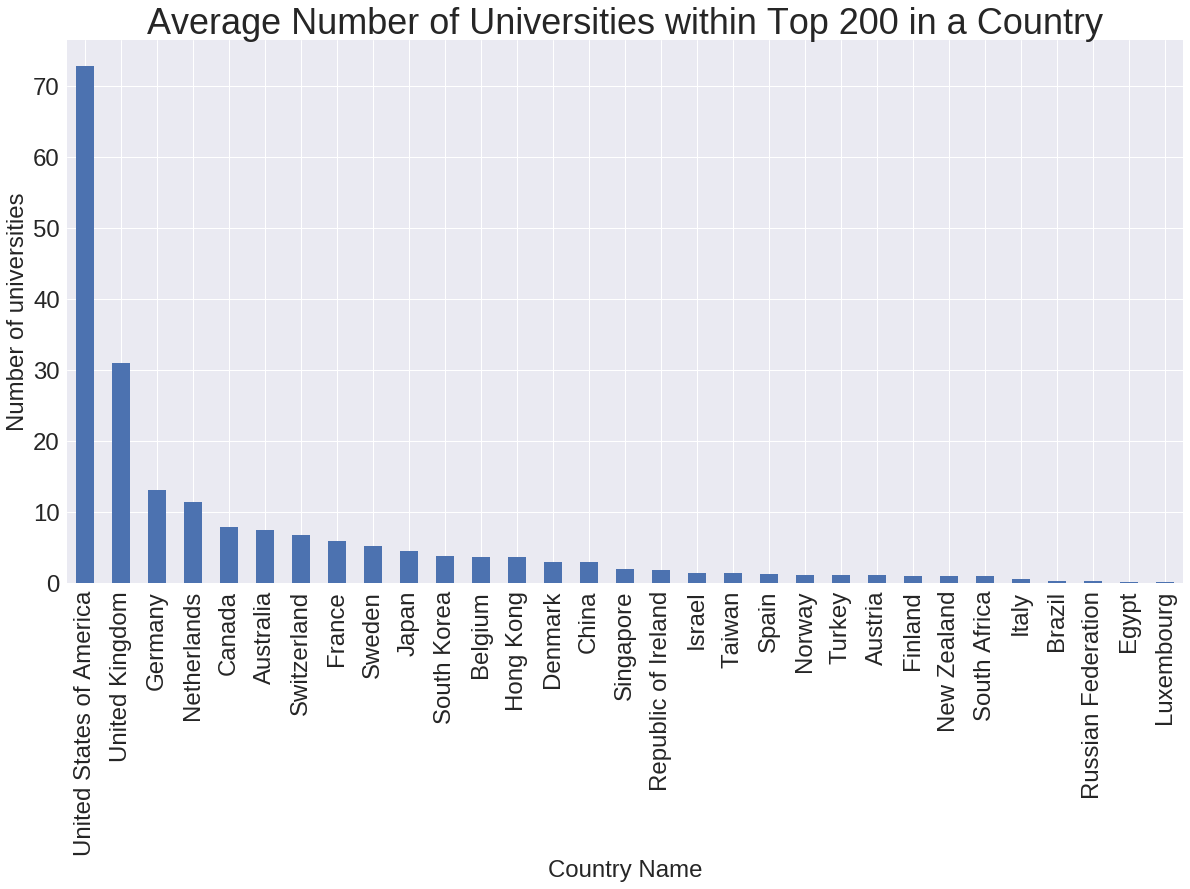

In [32]:
ax = country_uni.sort_values(ascending = False).plot(kind = 'bar', fontsize = 24, legend=False)
ax.set_title('Average Number of Universities within Top 200 in a Country', size=36)
ax.set_xlabel('Country Name', size=24)
ax.set_ylabel('Number of universities', size=24)

World rank top 200 universities across 6 years from 2011 to 2016.

Average unmber of universities in 6 years of every country:

Obviously, USA is predominatant, around 75;

Folllowed by UK, slightly more than 30, a sudden drop by more than a half;

The sum of the rest countries is just less than the sum of USA and UK.

Then use geopandas to display a geospatial distribution of top 200 universities

Since my dataset has no corresponding cities but only countries,

the demonstartion is only in country level.

## geopandas

First, load a dataset containing natrual earth geometries from geopandas

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head();

In [44]:
country_uni.index;

In [45]:
world['name'].values;

Define a function to find out some country names which are different between country_uni and world['name'].

In [42]:
def check_in(df):
    index = df.index
    in_out = {}
    for x in index:
        if x in world['name'].values:
            in_out[x] = True
        else:
            in_out[x] = False
    return in_out

In [43]:
check_in(country_uni)

{'Australia': True,
 'Austria': True,
 'Belgium': True,
 'Brazil': True,
 'Canada': True,
 'China': True,
 'Denmark': True,
 'Egypt': True,
 'Finland': True,
 'France': True,
 'Germany': True,
 'Hong Kong': False,
 'Israel': True,
 'Italy': True,
 'Japan': True,
 'Luxembourg': True,
 'Netherlands': True,
 'New Zealand': True,
 'Norway': True,
 'Republic of Ireland': False,
 'Russian Federation': False,
 'Singapore': False,
 'South Africa': True,
 'South Korea': False,
 'Spain': True,
 'Sweden': True,
 'Switzerland': True,
 'Taiwan': True,
 'Turkey': True,
 'United Kingdom': True,
 'United States of America': False}

There are several mismatches between the country names of two datasets.

1. rename indcies;

2. modify values;

3. delete rows.

P.S. No Singapore

In [46]:
country_uni = country_uni.rename(index = {'United States of America': 'United States', 'South Korea': 'Korea', 'Republic of Ireland': 'Ireland', 'Russian Federation': 'Russia', })
country_uni['China'] = country_uni['China'] + country_uni['Hong Kong']
del country_uni['Hong Kong'];

Reindex dataframe countr_uni by world['name'];

Fill missing values as 0.

In [47]:
country_uni = country_uni.reindex(world['name'], fill_value = 0);

Add one column called 'uni_per_country' into world;

Pass values of dataframe country_uni to 'uni_per_country'.

Then every country in world has both geometries and university numbers.

In [48]:
world['uni_per_country'] = country_uni.values

Get value range of column 'uni_per_country';

plot the choropleth map with a colorbar on the right.

In [49]:
vmin = world['uni_per_country'].min()
vmax = world['uni_per_country'].max()

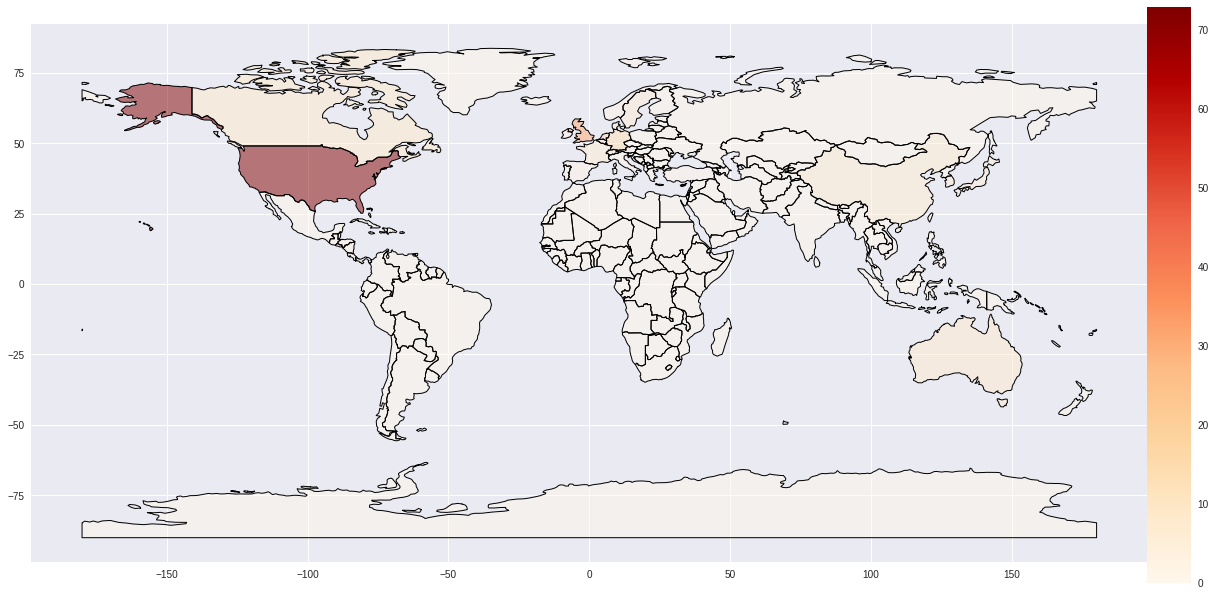

In [50]:
import shapely
ax = world.plot(column = 'uni_per_country', cmap="OrRd")
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);

Overall, USA has a very DARK color.

while in contrast, the colors of all other countries are almost the same and faded away.

Mostly, we only care about the first, while the second is nothing but the same as the rest that we barely know.

## University with average world rank top 10

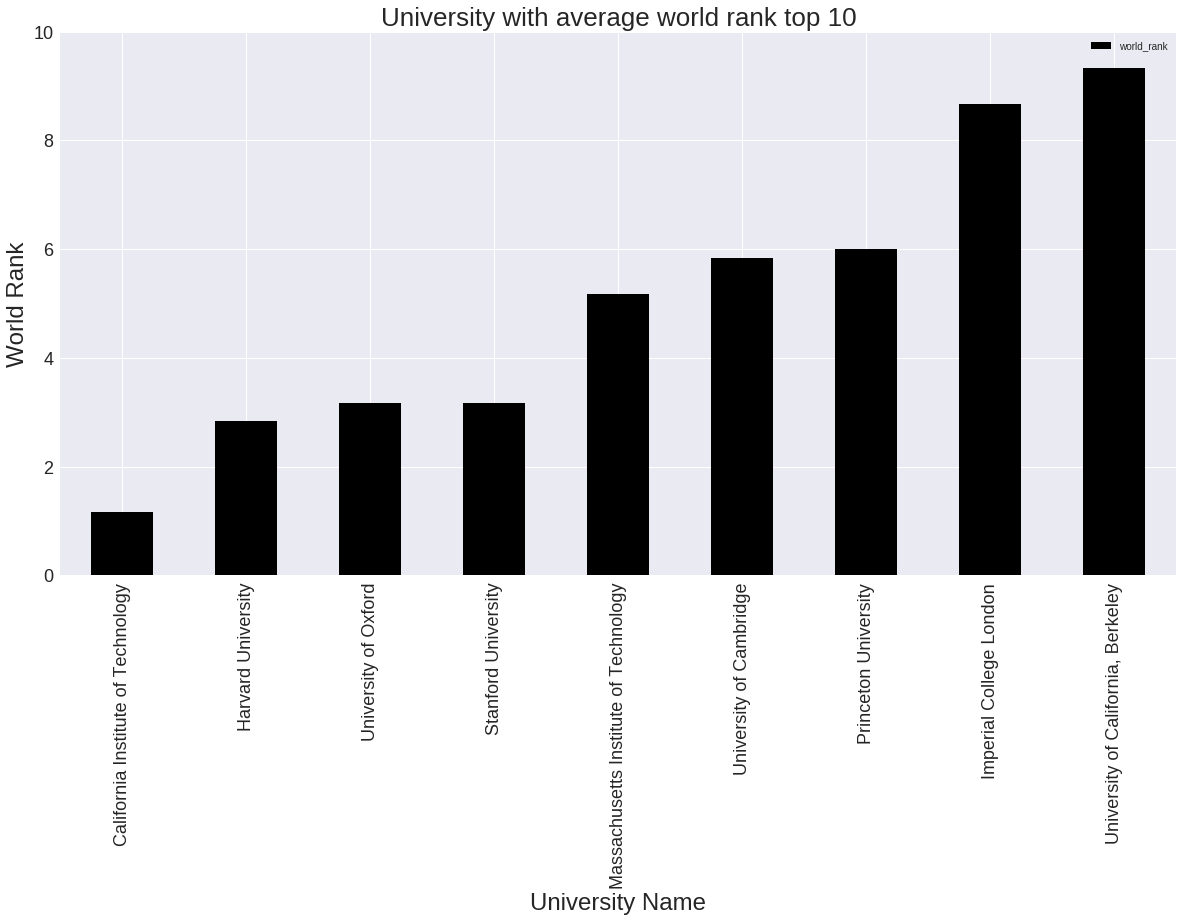

In [51]:
uni_rank = wur_data.pivot_table(index = 'university_name', values = 'world_rank', aggfunc = np.mean)
ax = uni_rank.sort_values(ascending = True)[uni_rank < 10.1].plot(kind='bar', fontsize= 18, legend=True, color='black')
ax.set_xlabel('University Name', size=24)
ax.set_ylabel('World Rank', size=24)
ax.set_title('University with average world rank top 10', size=26)
ax.set_ylim(0, 10)
ax.grid(True)

3 UK; 6 USA.

## Average score of each indicator of every country from 2011 to 2016

Define a fucniton that creates a spreadsheet-style pivot table as a DataFrame and save to a dictionary.

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

The performance indicators are grouped into five areas:

    30%  Teaching (the learning environment)
    30%  Research (volume, income and reputation)
    30%  Citations (research influence)
    7.5% International outlook (staff, students and research)
    2.5% Industry income (knowledge transfer).


In [81]:
def score_mean(df):
    score_dict={}
    for i in range(3,9):
        x = df.columns[i]
        score_dict[x] = df.pivot_table(index='country', columns='year', values=x, aggfunc=np.mean, dropna=True)
    return score_dict

In [83]:
score_dict = score_mean(wur_data)

In [103]:
def loop_year(column):
    for i in range(2011, 2017):
        ax = score_dict['total_score'][i].sort_values(ascending=False).plot(kind='bar')
        if '_' in column:
            column = column.replace('_', ' ')
        ax.set_xlabel('Country Name', size=24)
        ax.set_ylabel('Average Score', size=24)
        ax.set_title('Average Score of {} in Year {}'.format(column, i).title(), size=26)
        plt.show()

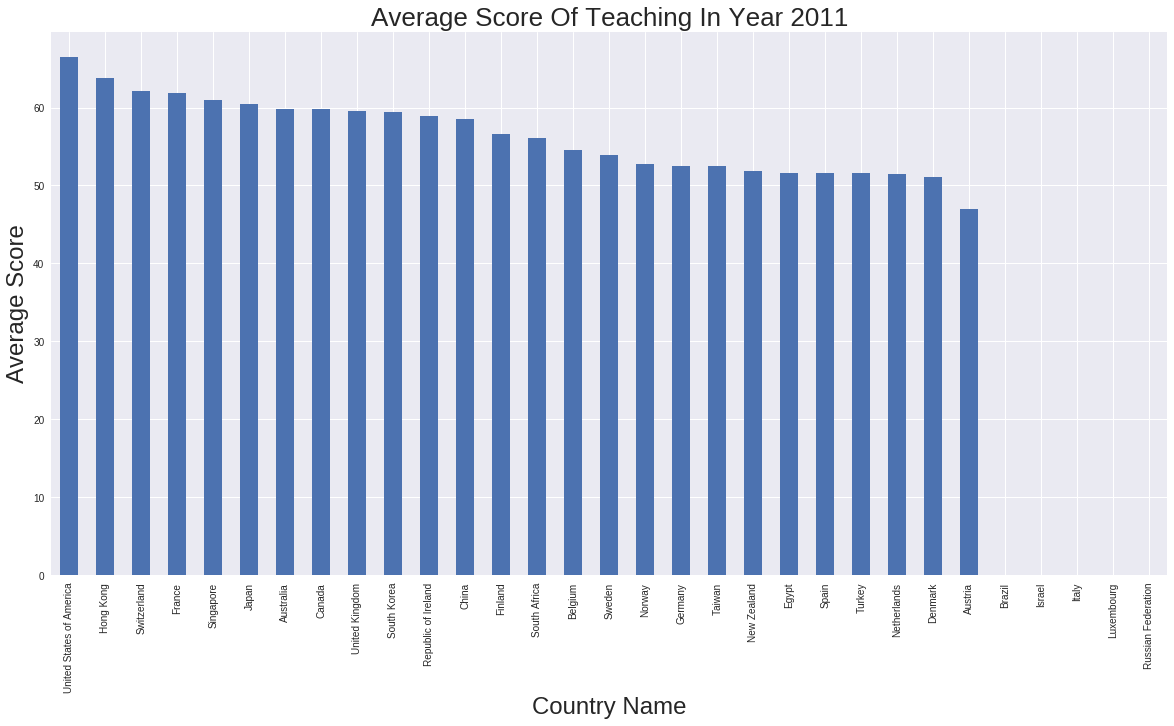

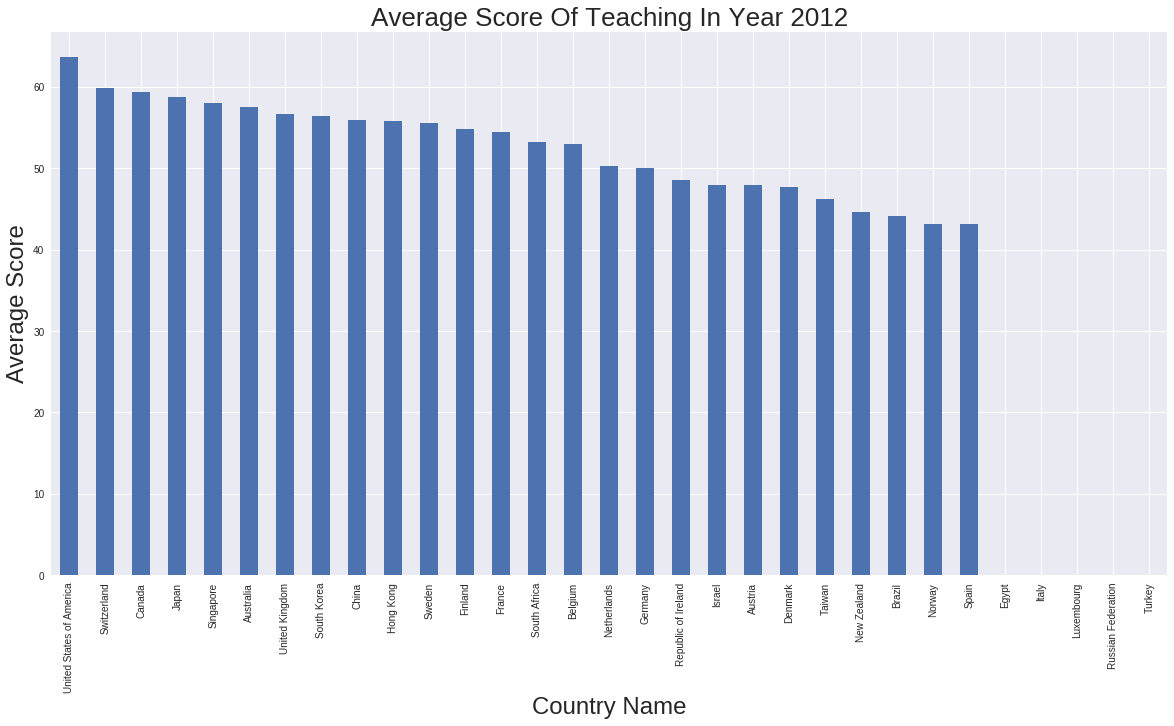

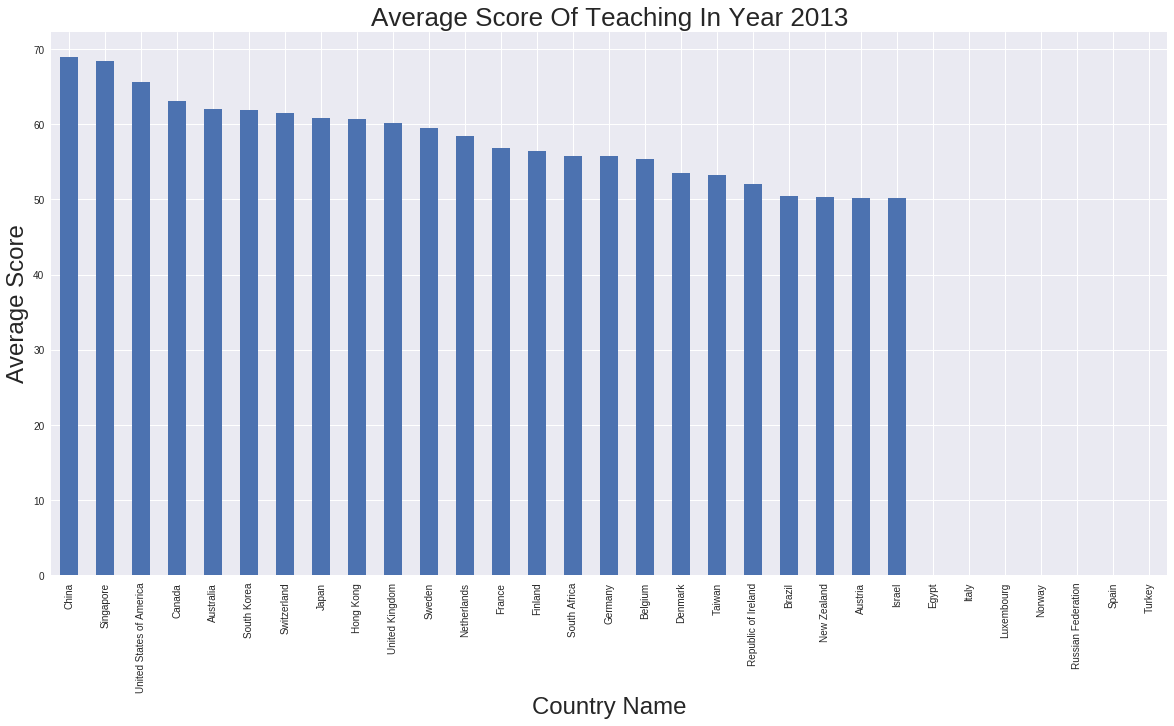

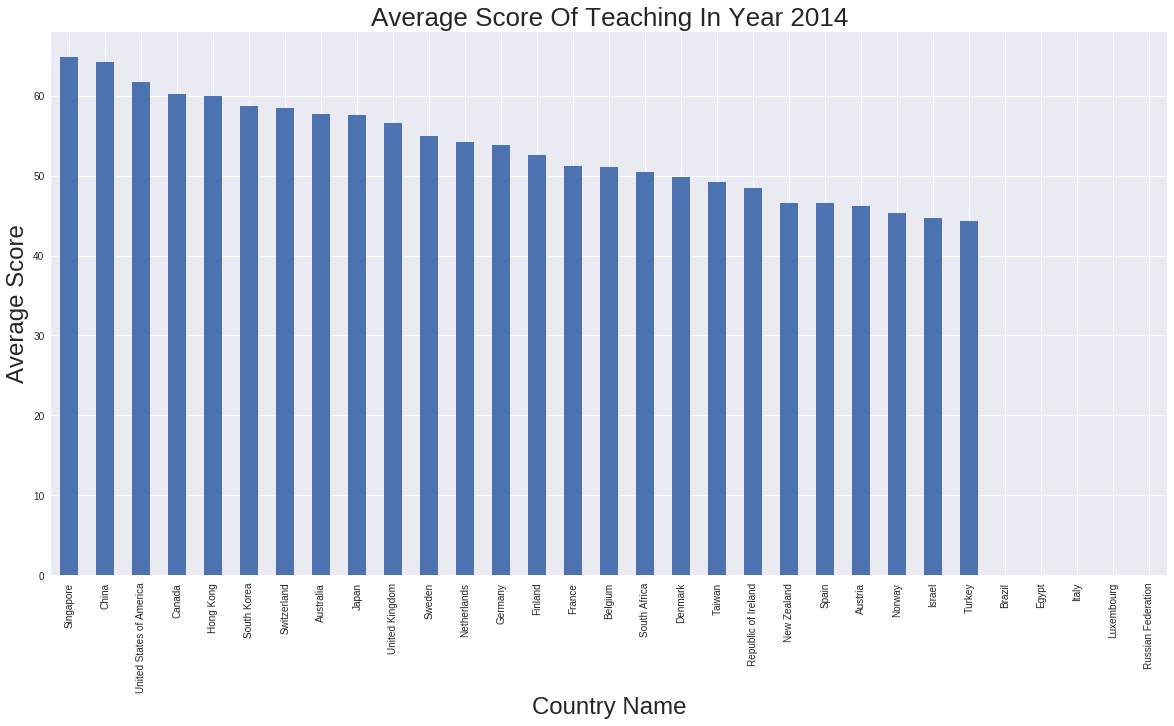

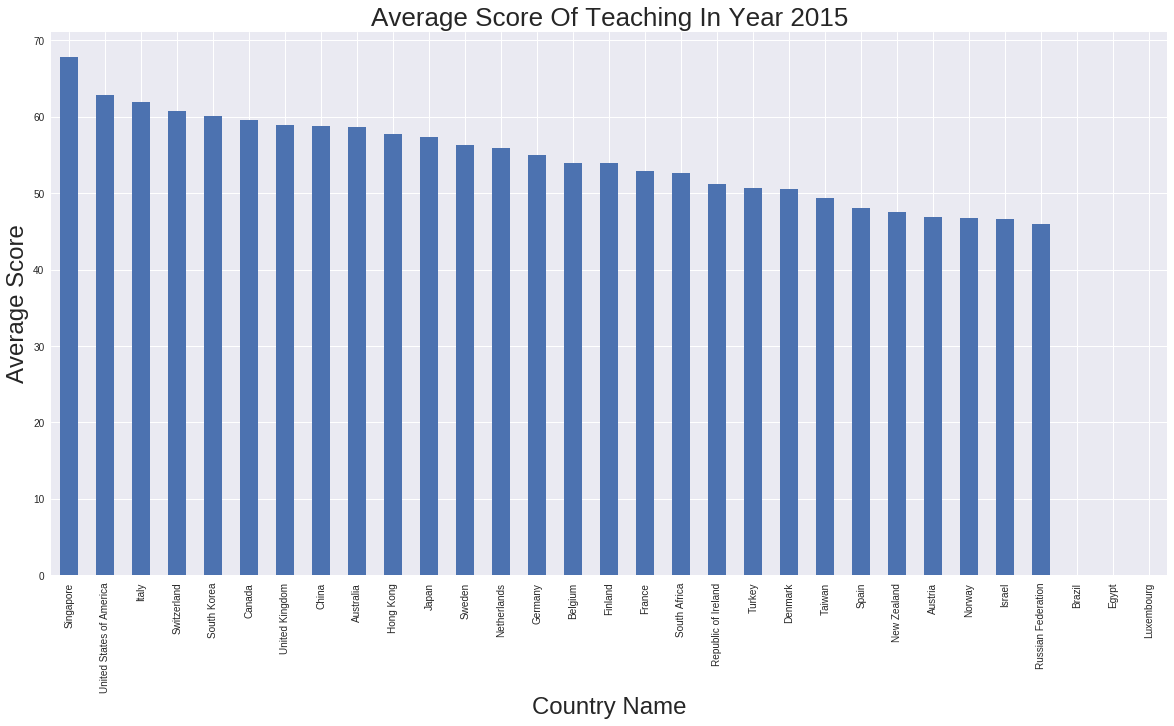

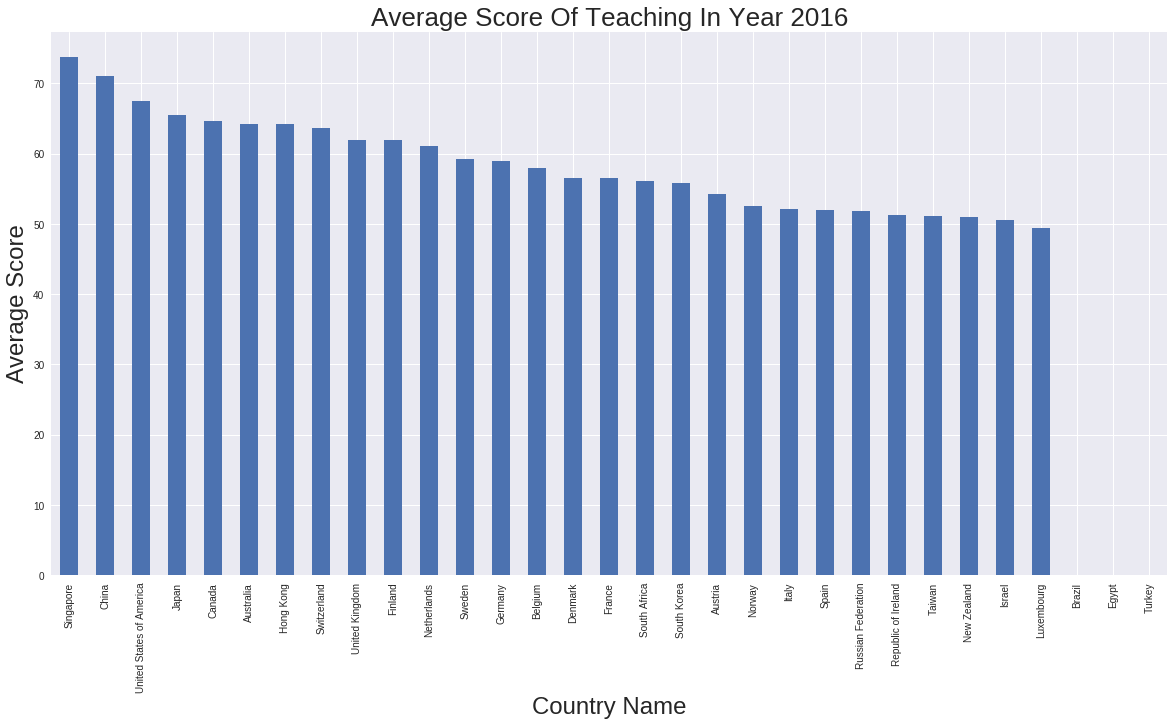

In [107]:
loop_year('teaching')

In [115]:
def loop_indicator(year):
    for i in range(3,9):
        column = wur_data.columns[i]
        ax = score_dict[column][year].sort_values(ascending=False).plot(kind='bar')
        if '_' in column:
            column = column.replace('_', ' ')
        ax.set_xlabel('Country Name', size=24)
        ax.set_ylabel('Average Score', size=24)
        ax.set_title('Average Score of {} in Year {}'.format(column, year).title(), size=26)
        plt.show()

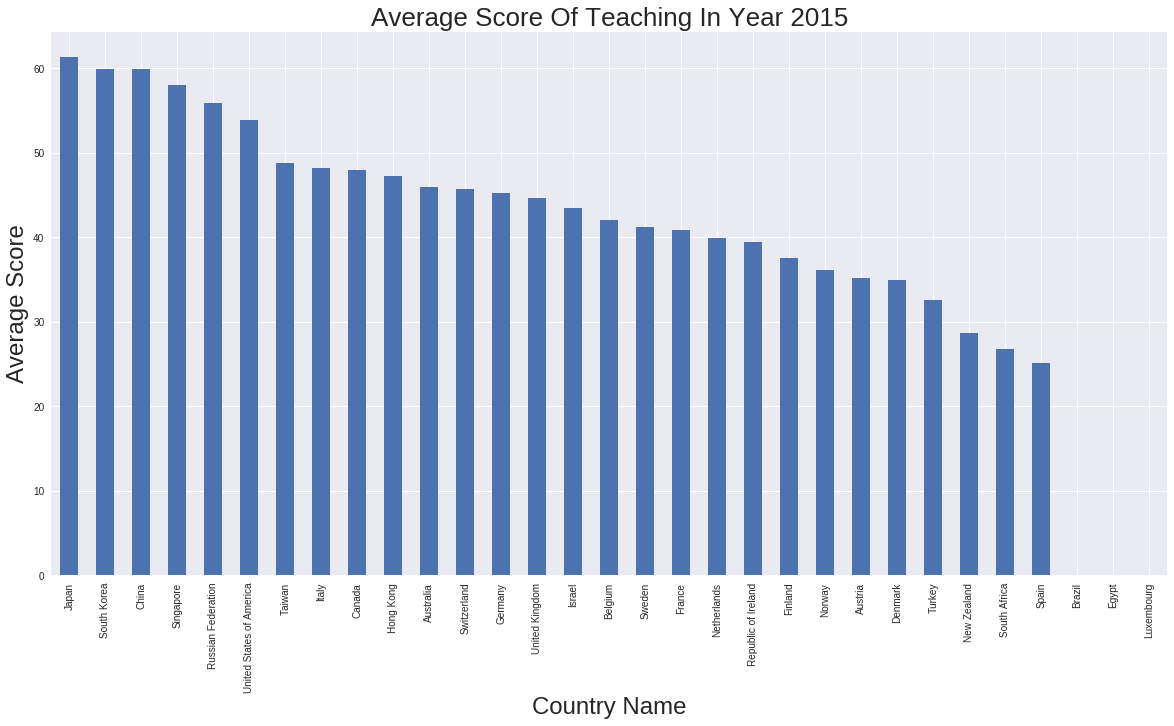

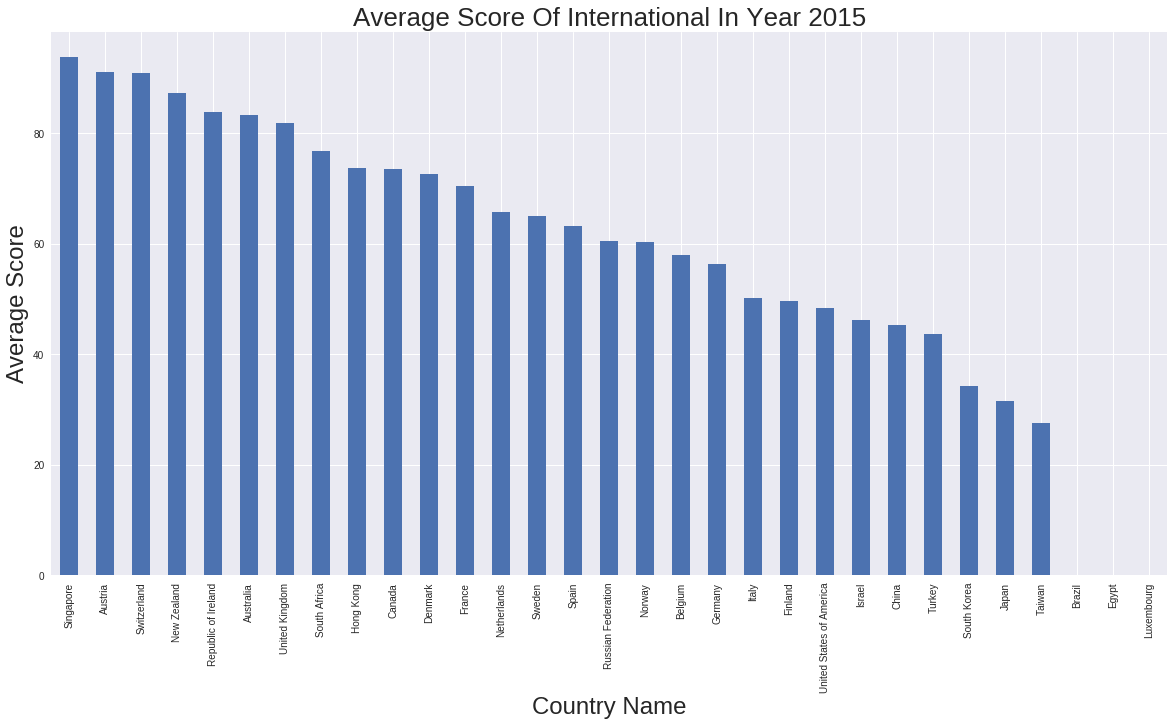

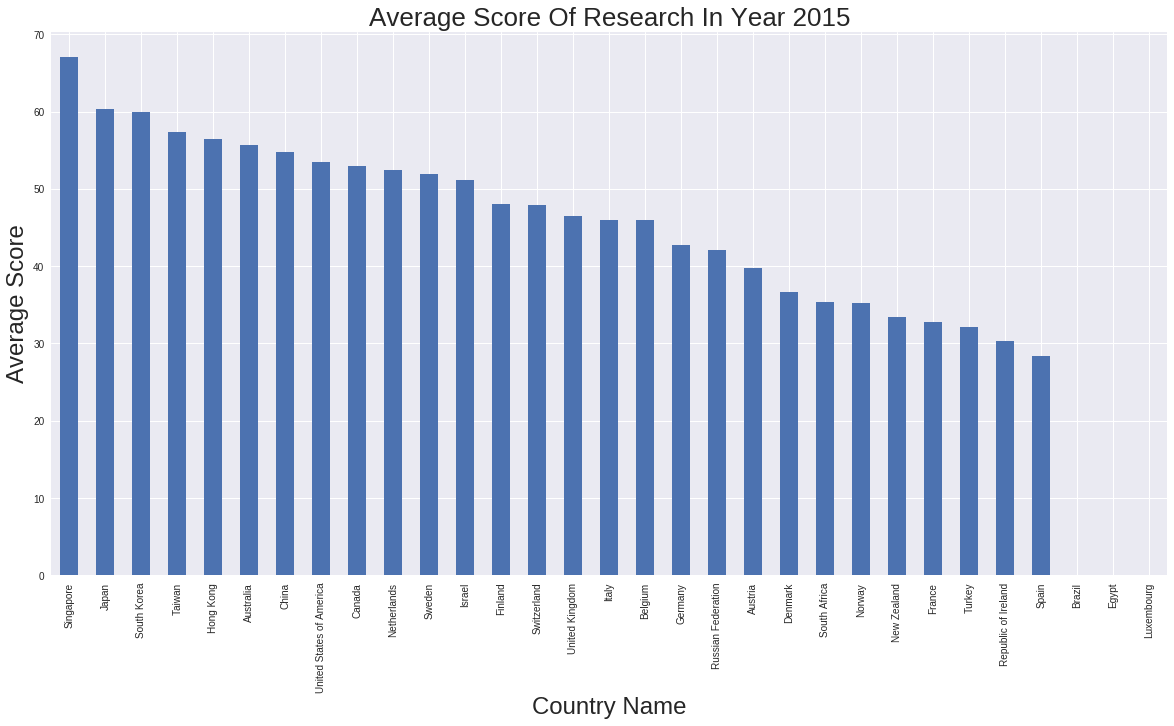

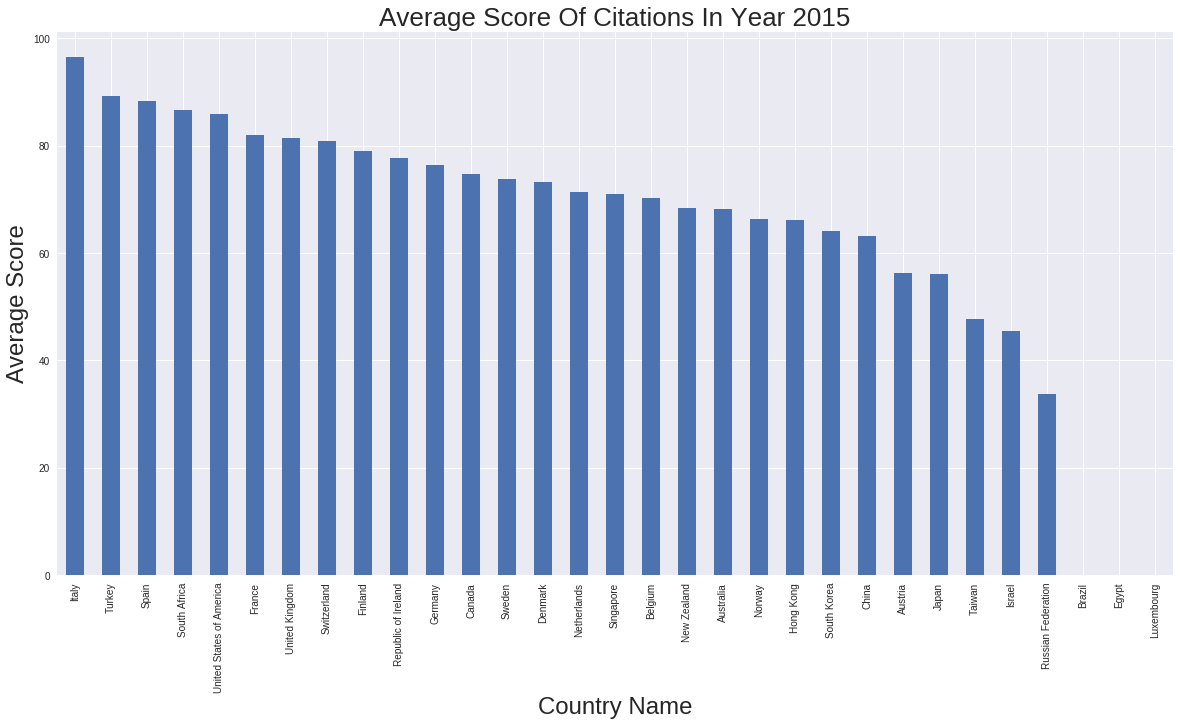

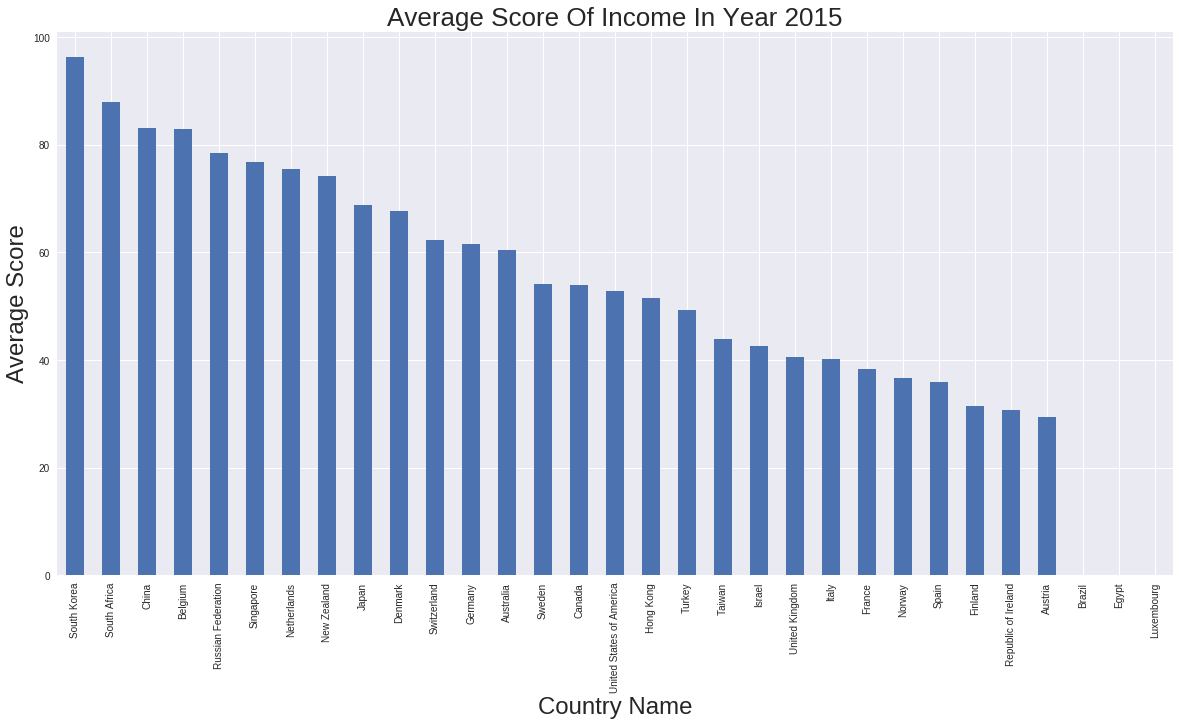

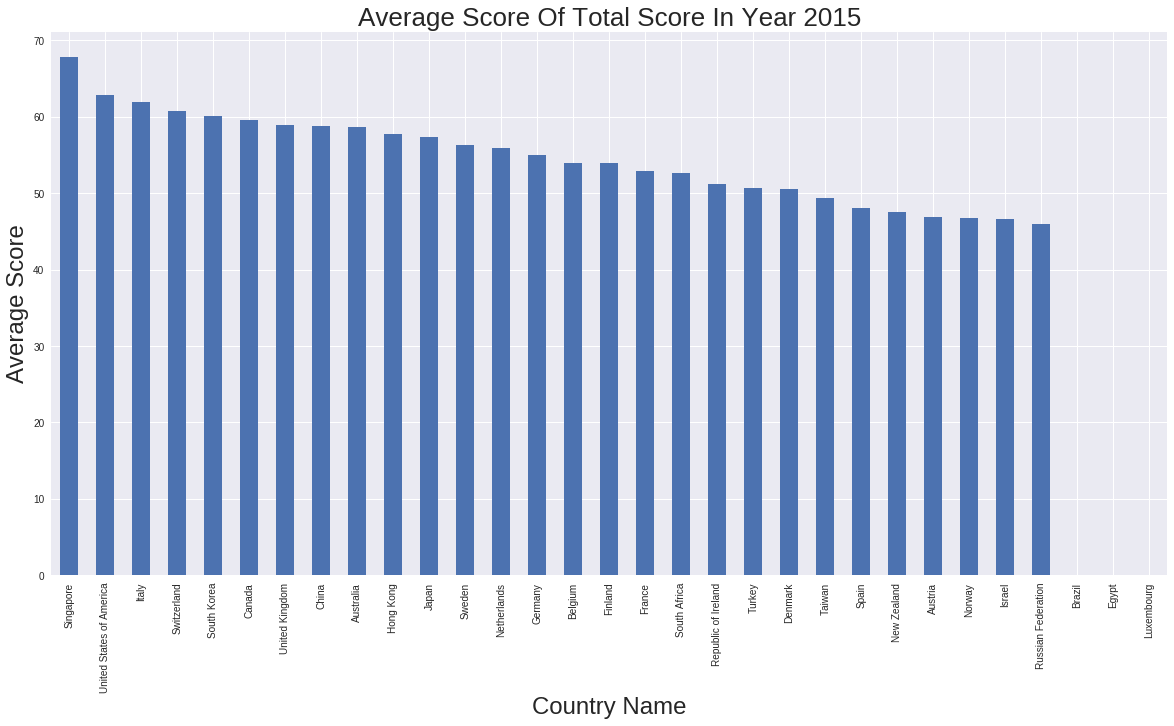

In [116]:
loop_indicator(2015)

## Histgram

Define a function to draw one histgram with bins=100, norminalised.

In [52]:
def hist(df, column):
    plt.hist(df[column].dropna(), bins=100, normed=1, facecolor='blue')
    if '_' in column:
        column = column.replace('_', ' ')
    plt.xlabel(column.title(), fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
    plt.title('{} Distribution'.format(column).title(), fontsize = 36)
    plt.grid(True)
    plt.show()

Use a for loop and function hist to draw histgrams for every column which has number in the data.

In [54]:
def loop_plot(kind):
    for i in range(len(wur_data.columns)):
        column = wur_data.columns[i]
        if type(wur_data[column][0]) != str and column != 'year':
            kind(wur_data, column)

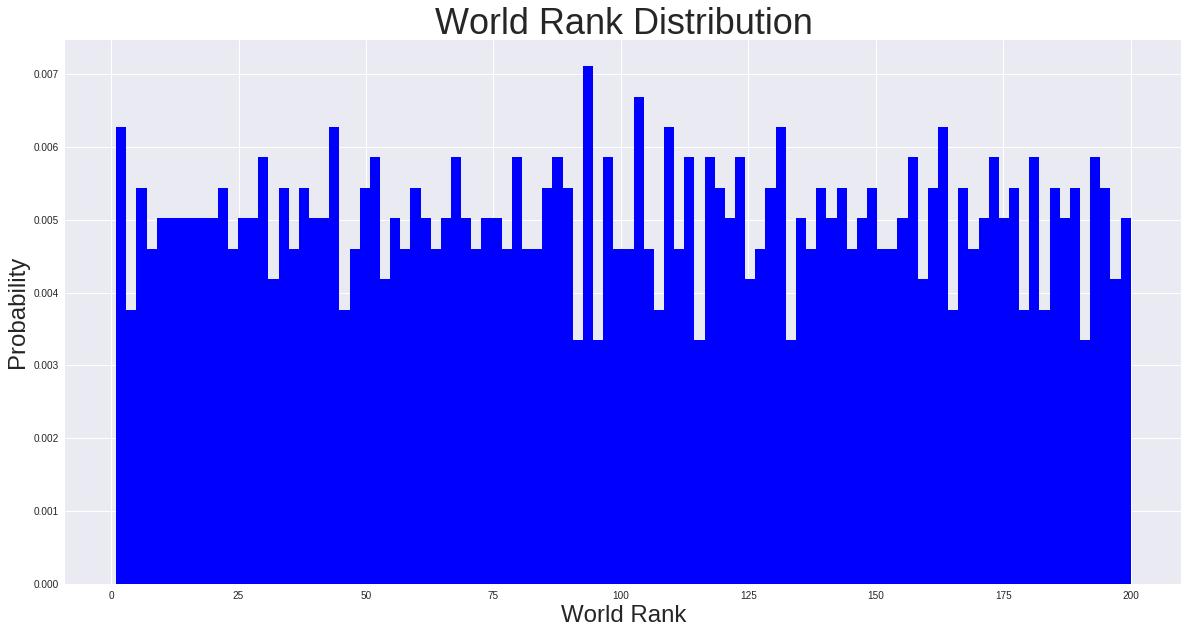

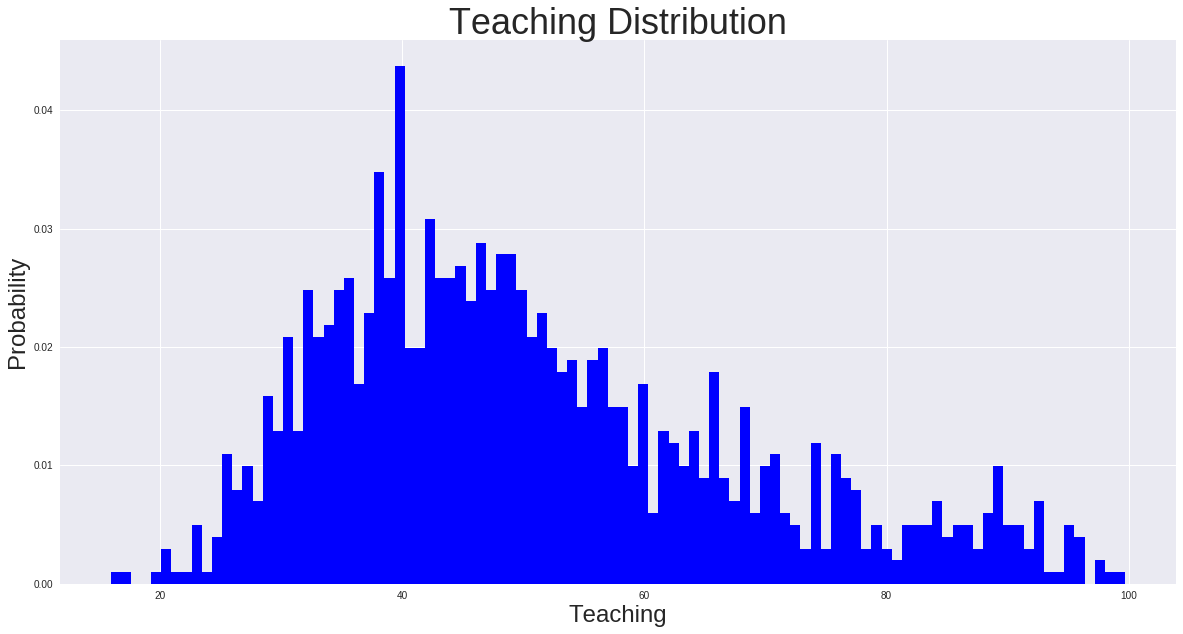

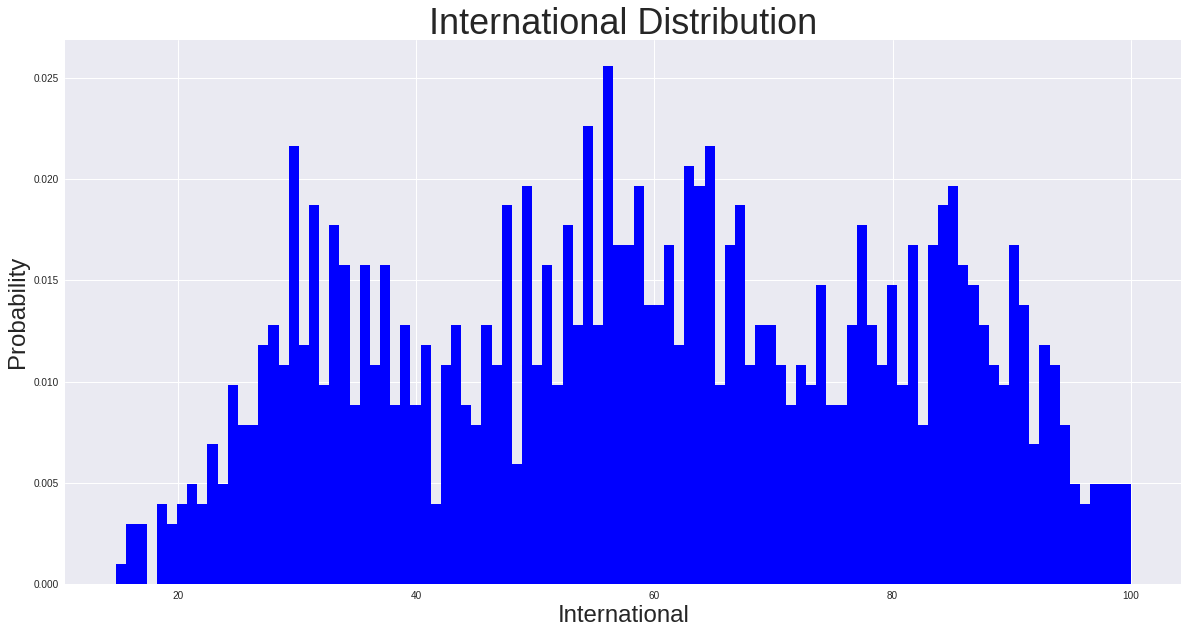

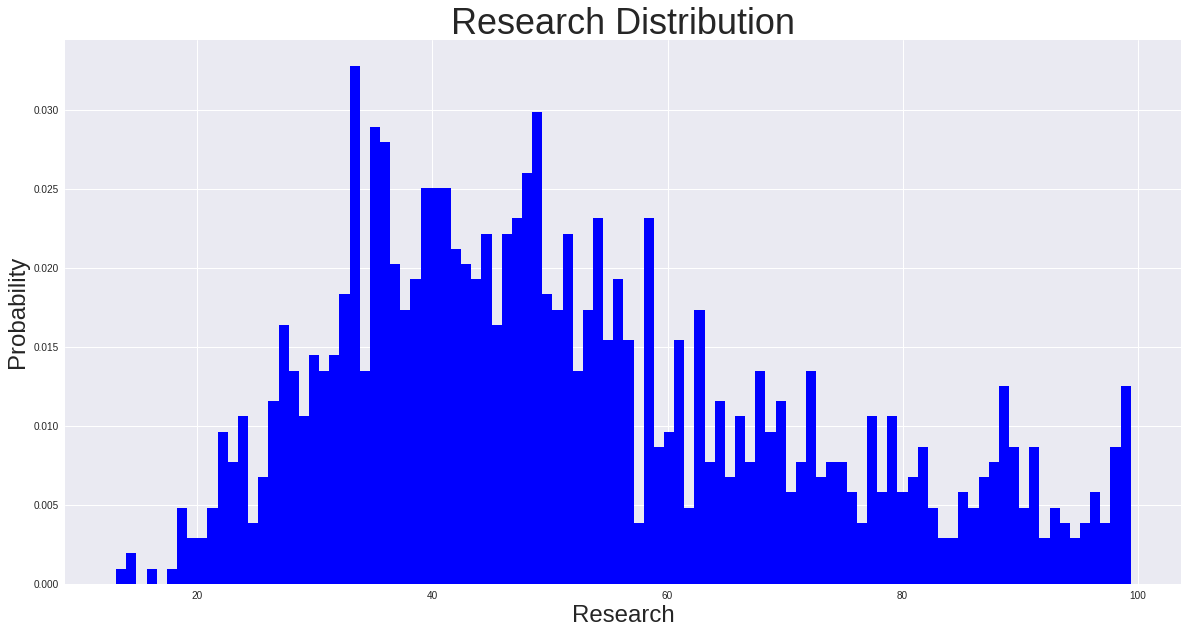

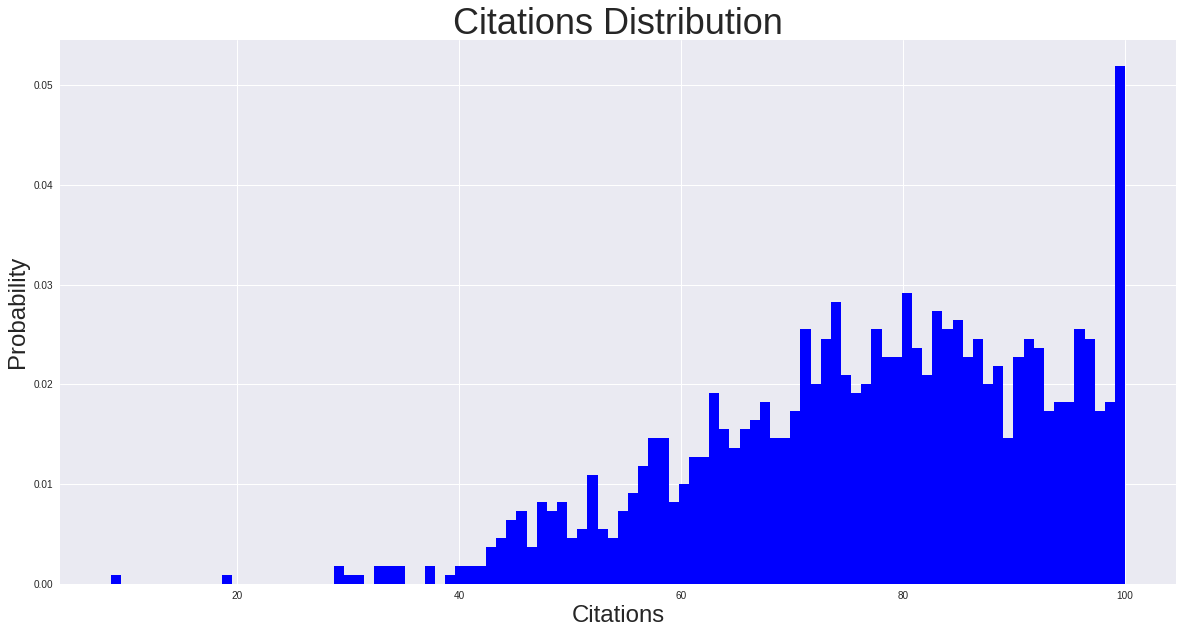

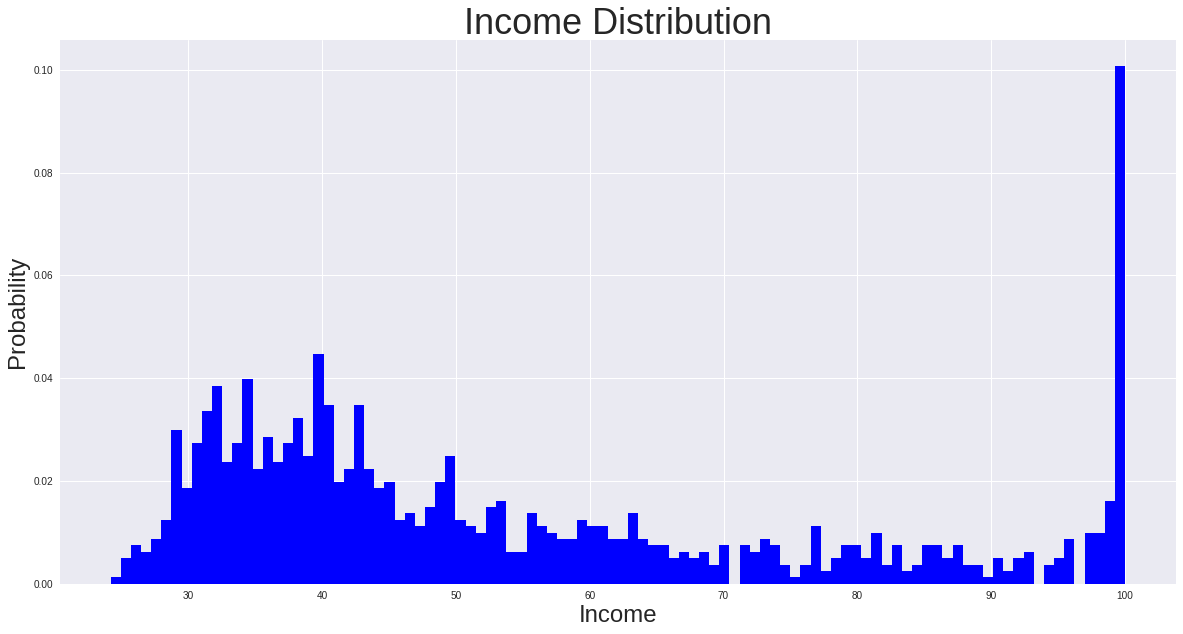

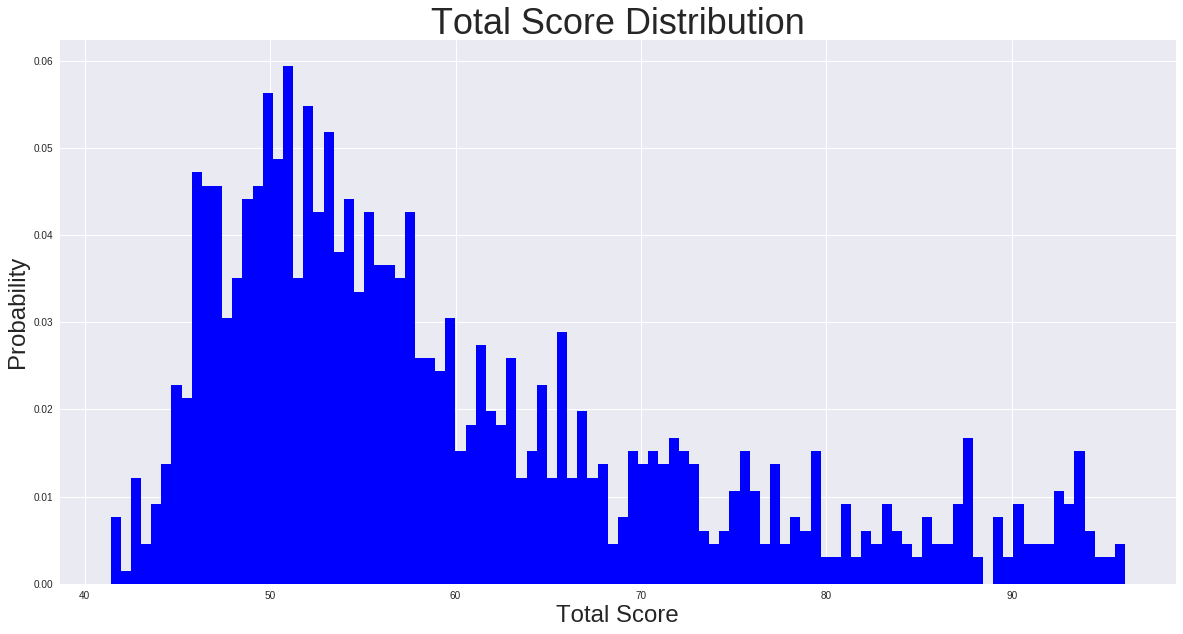

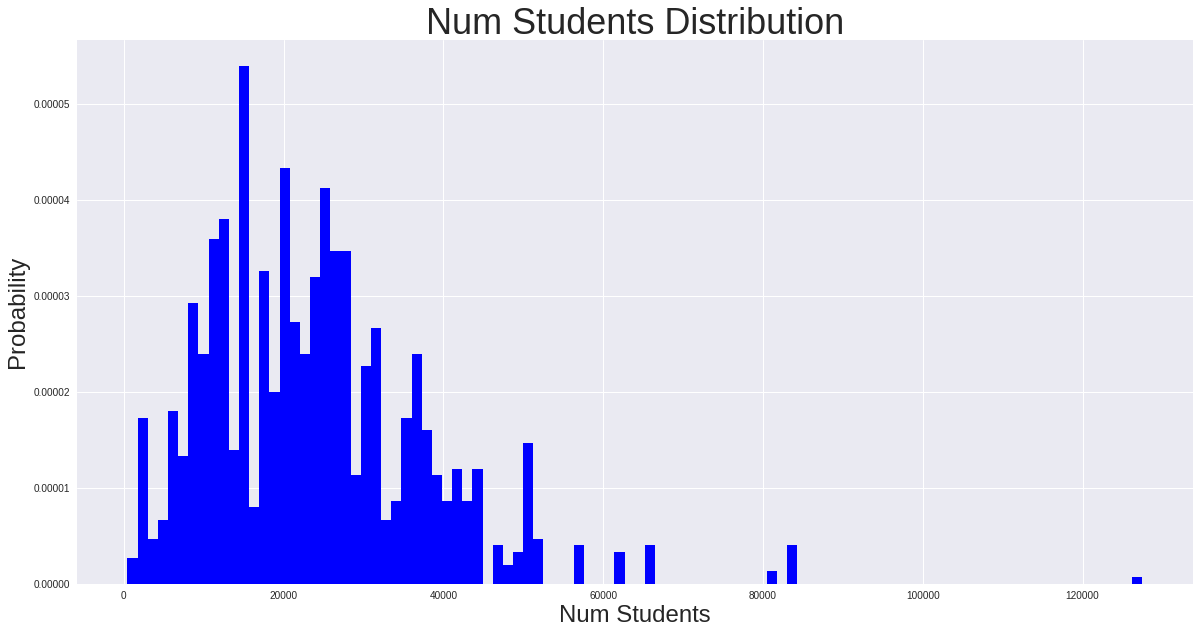

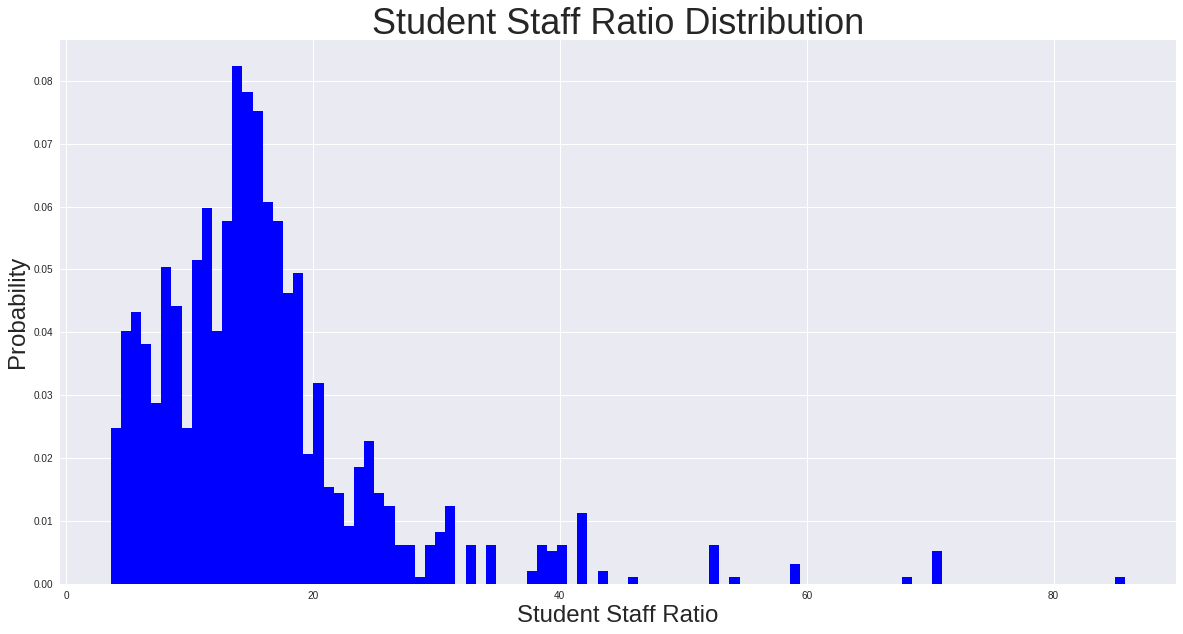

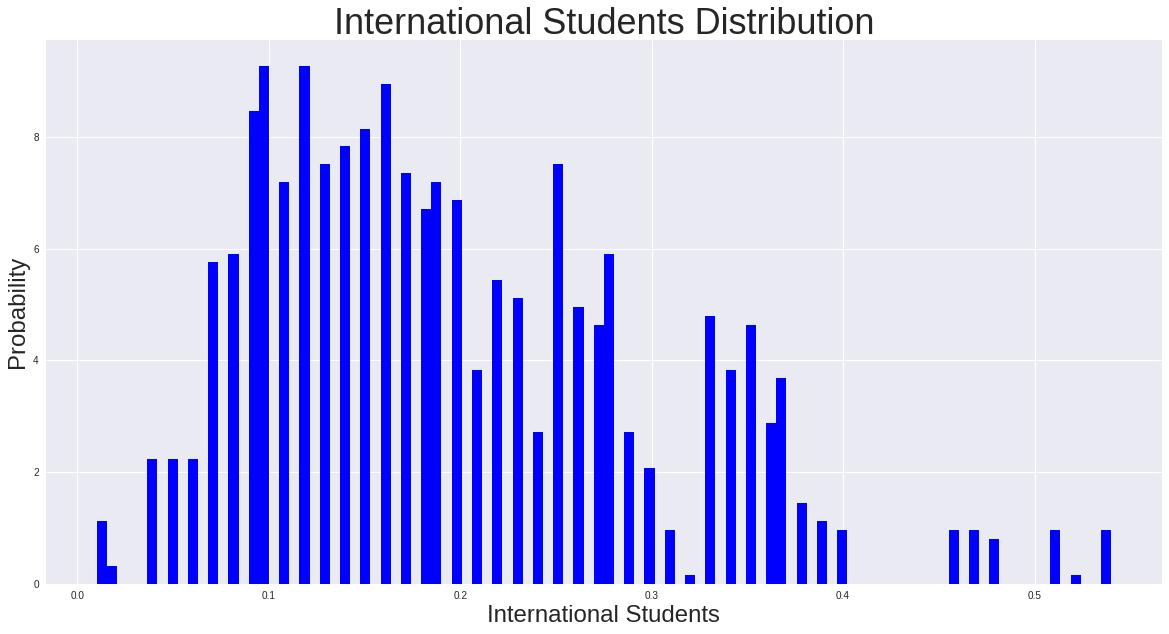

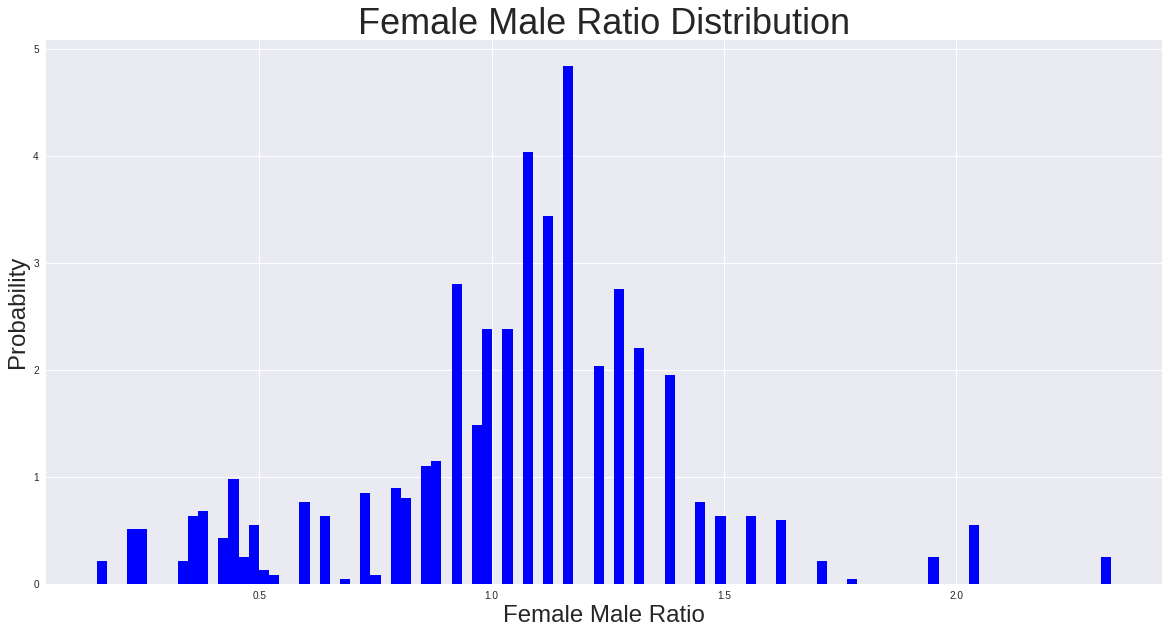

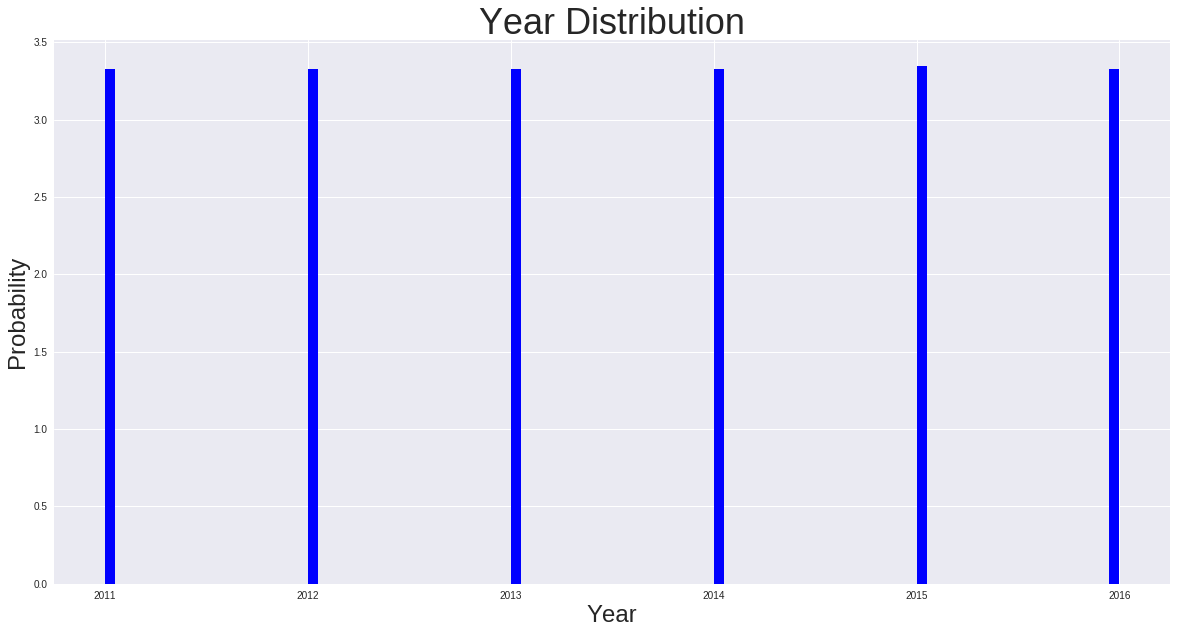

In [169]:
loop_plot(hist)

## Seaborn plot

A normed histogram like plt.hist();

A gaussian kernel density estimate;

A rugplot on the support axis (plot datapoints in an array as sticks on an axis).

In [65]:
def distplot(df, column):
    ax = sns.distplot(df[column].dropna(), rug=True, rug_kws={"color": "g"},
                      kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                      hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    if '_' in column:
        column = column.replace('_', ' ')
    ax.set_xlabel(column.title(), fontsize = 24)
    ax.set_ylabel('Probability', fontsize = 24)
    ax.set_title('{} Distribution'.format(column).title(), fontsize = 36)
    sns.plt.show()

### KDE
In statistics, kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

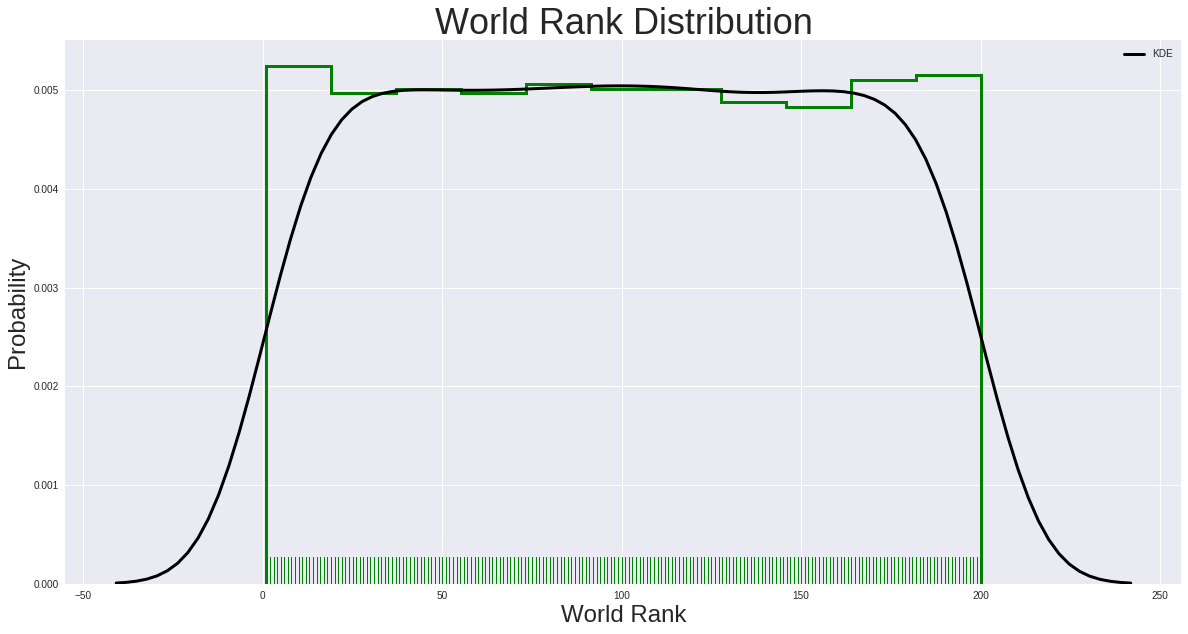

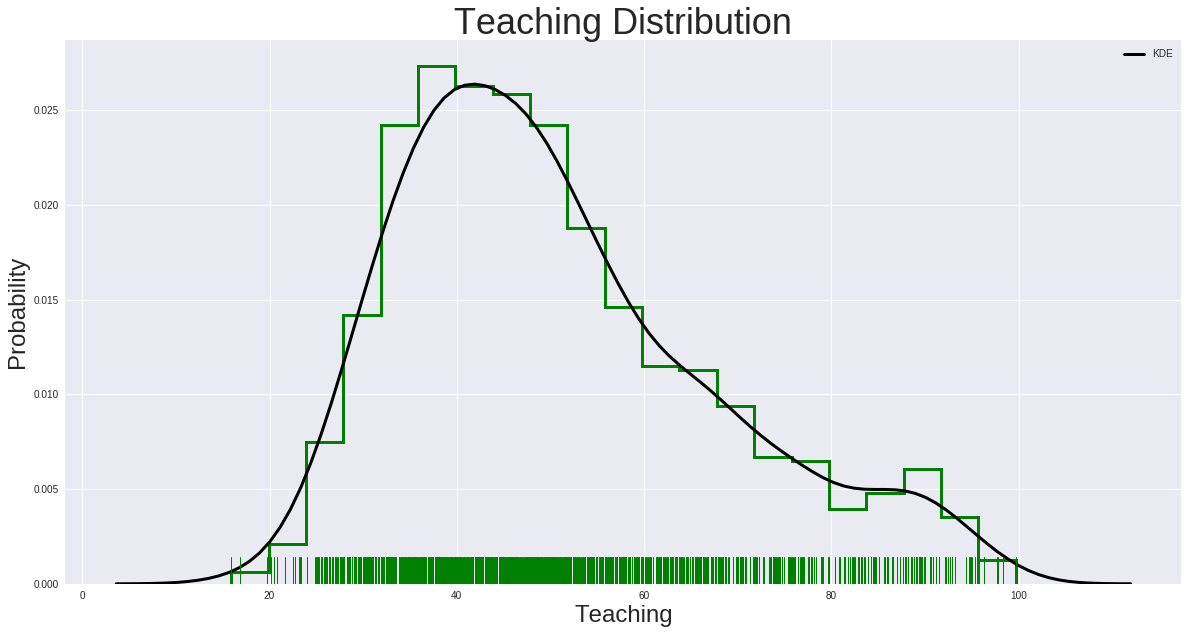

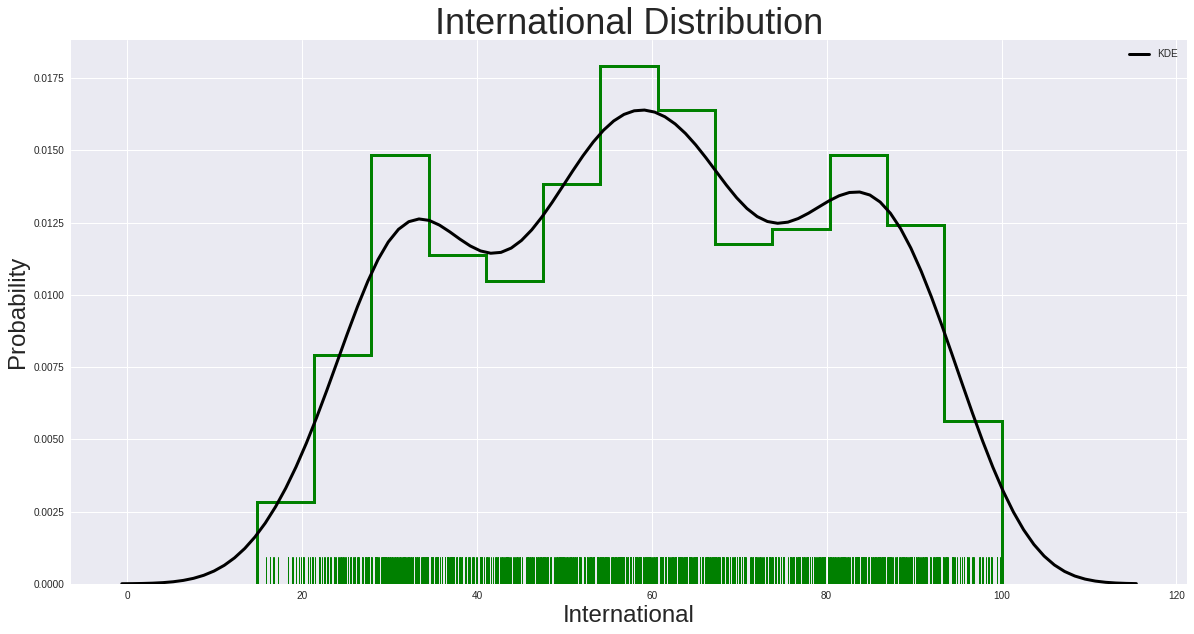

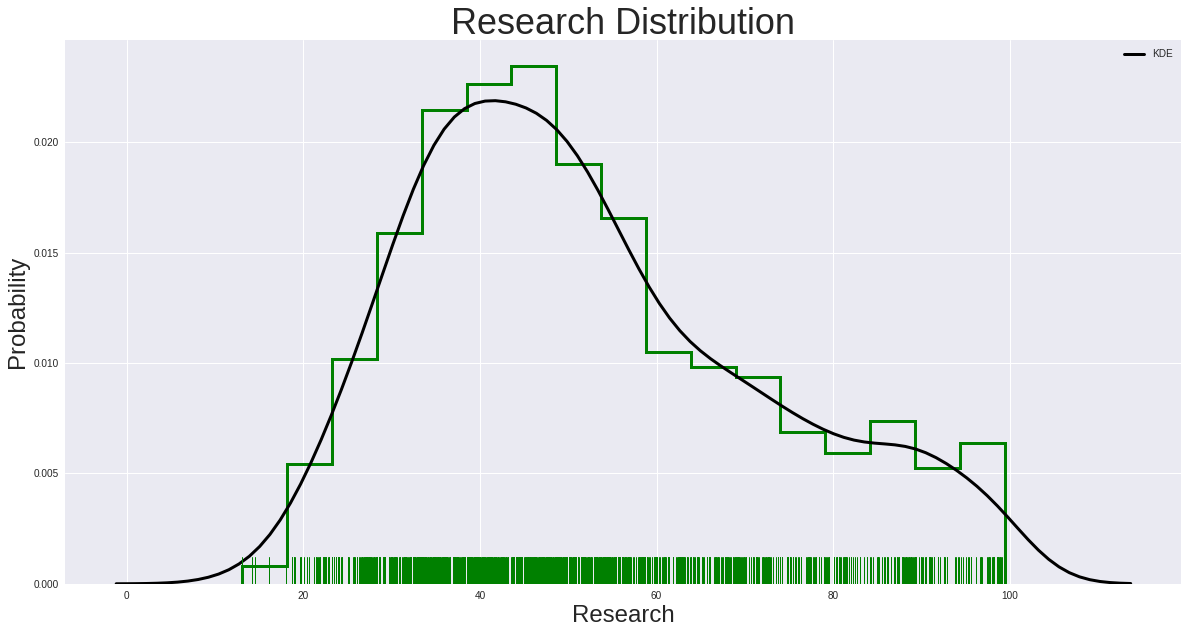

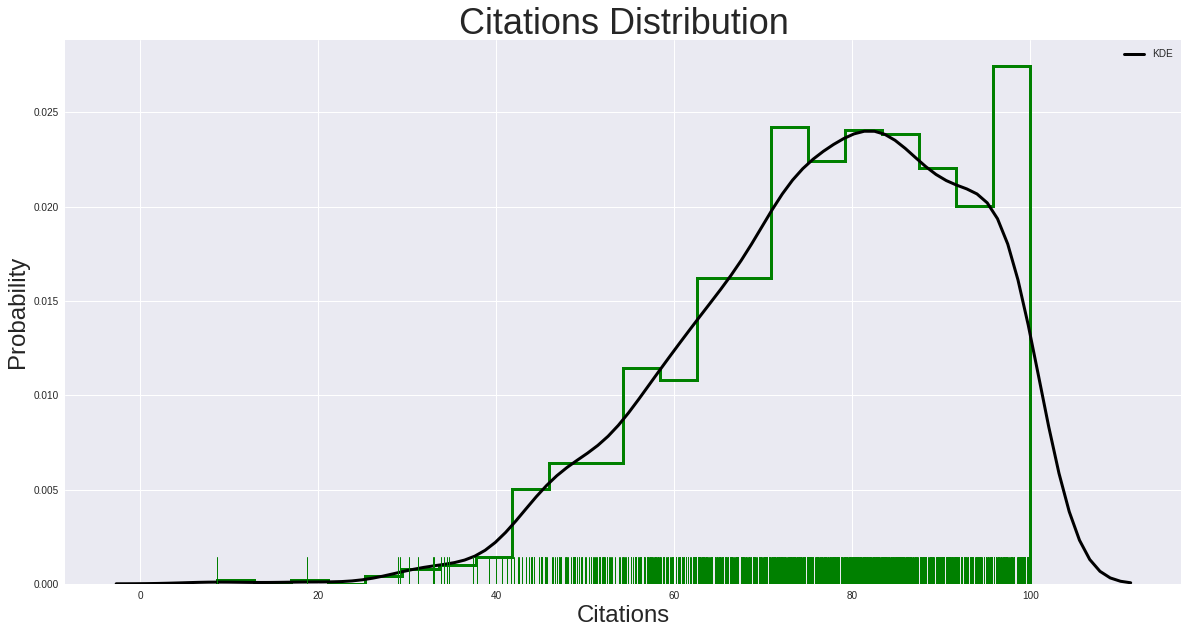

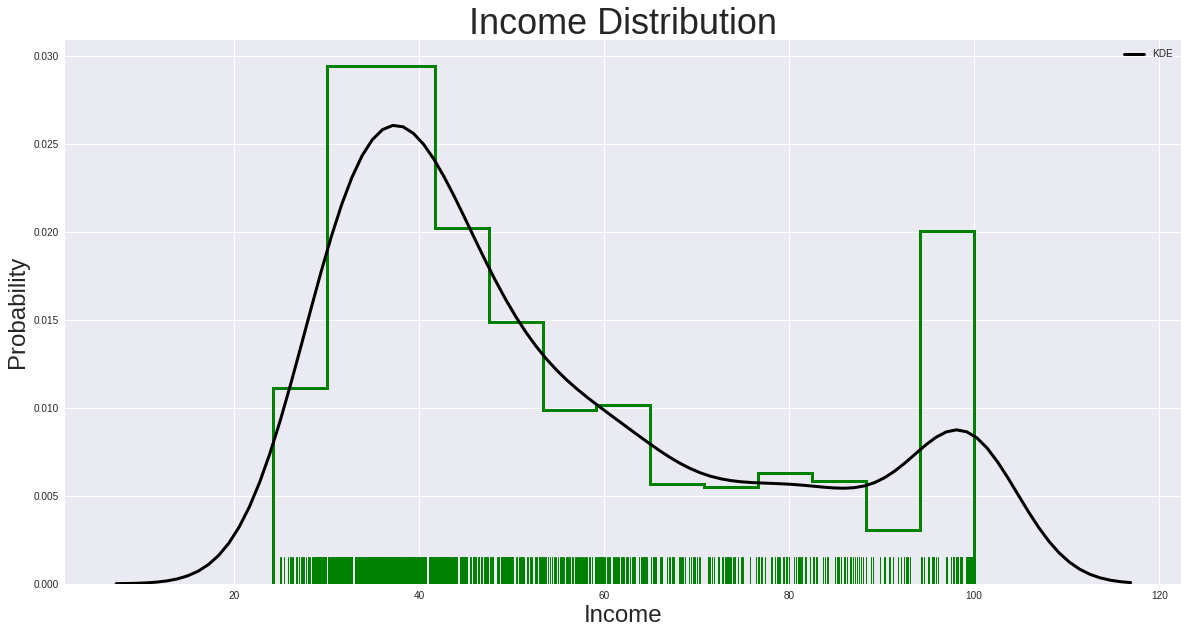

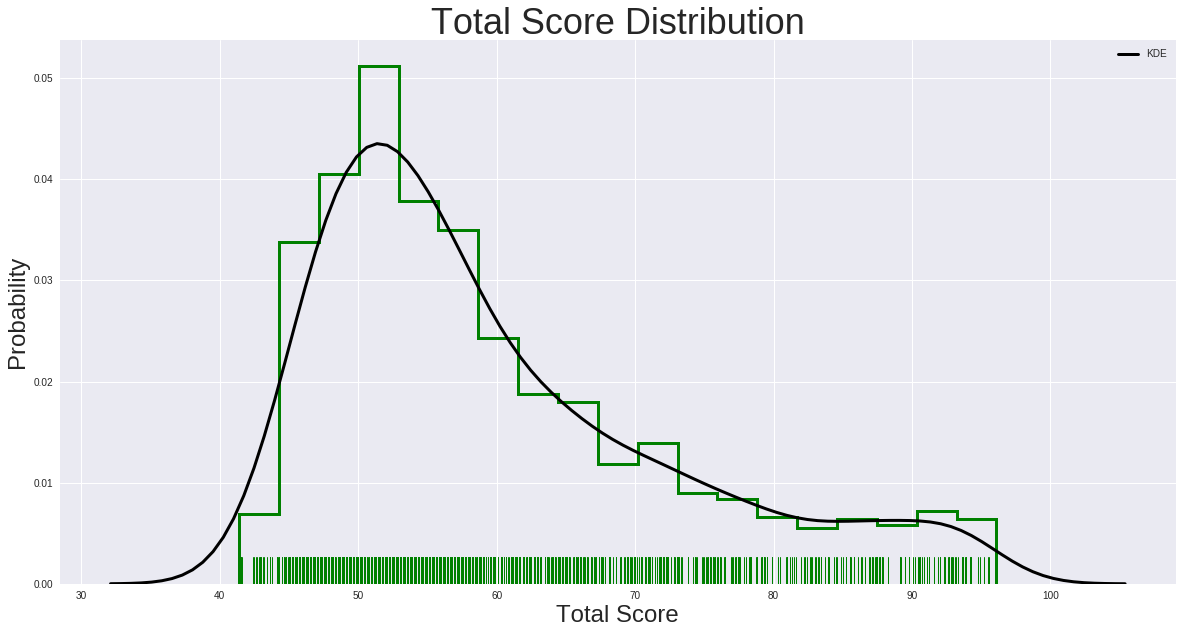

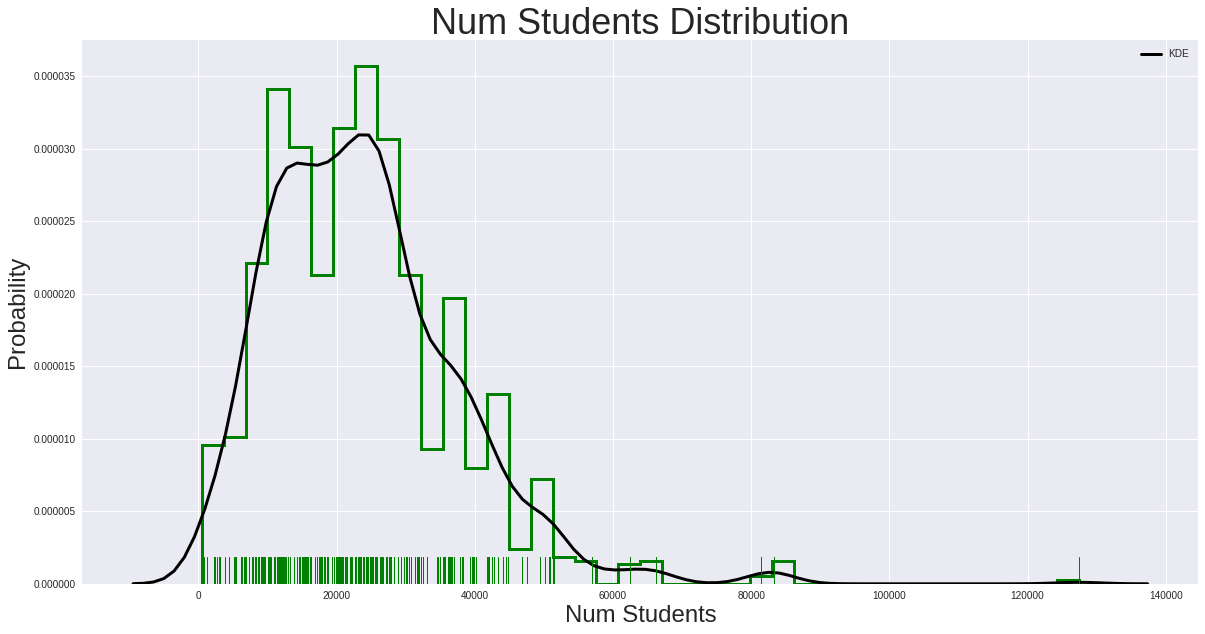

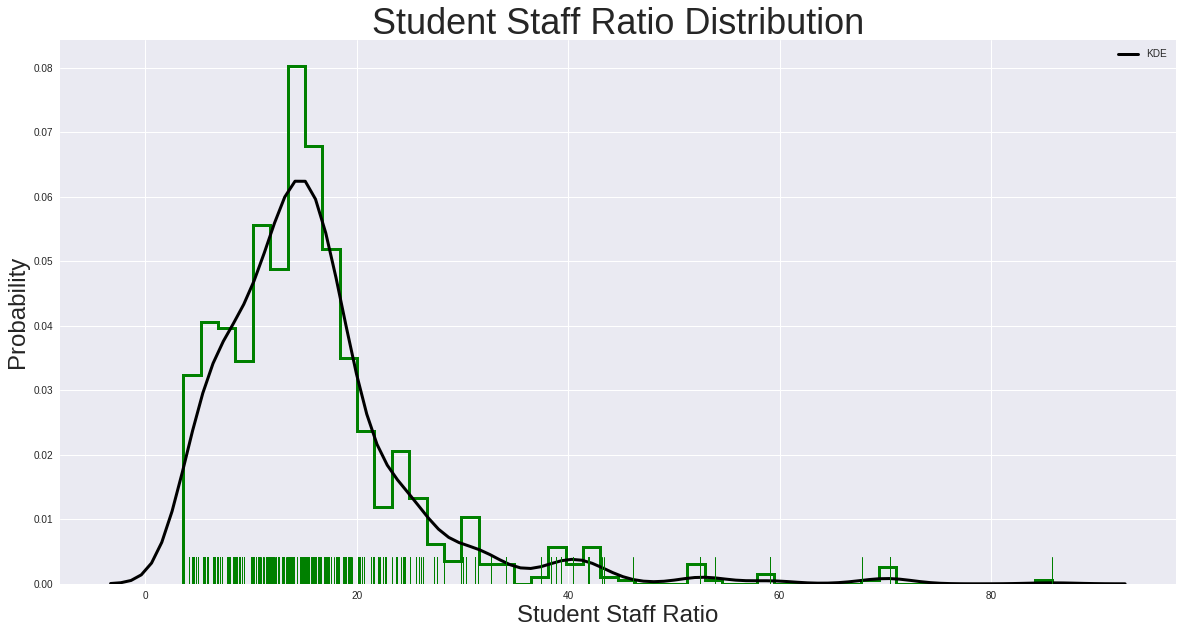

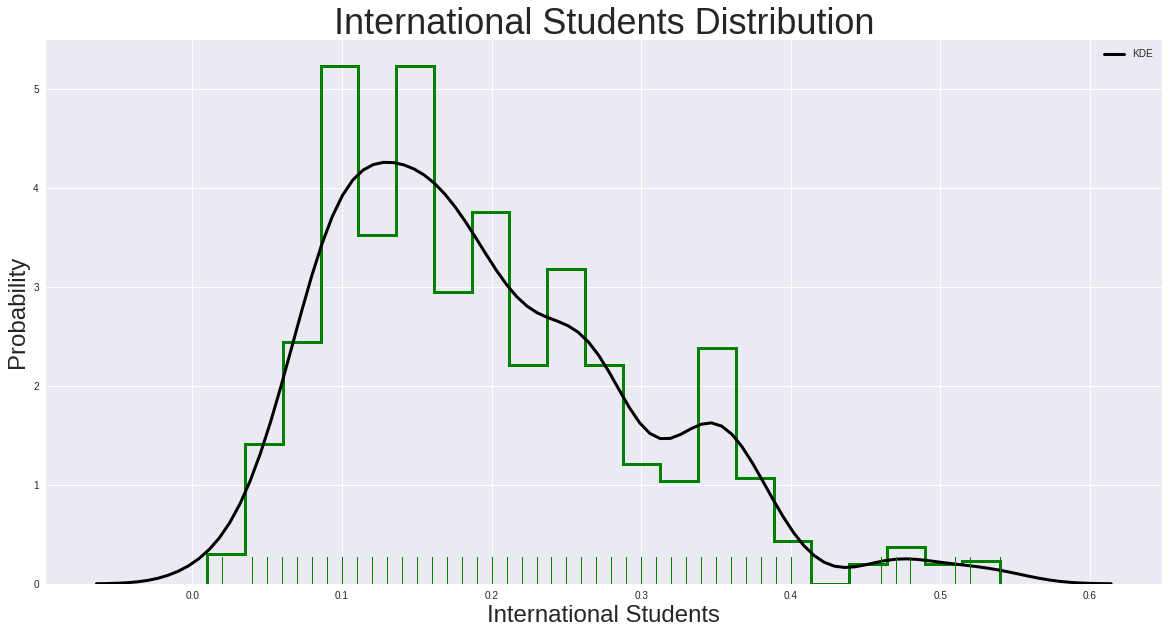

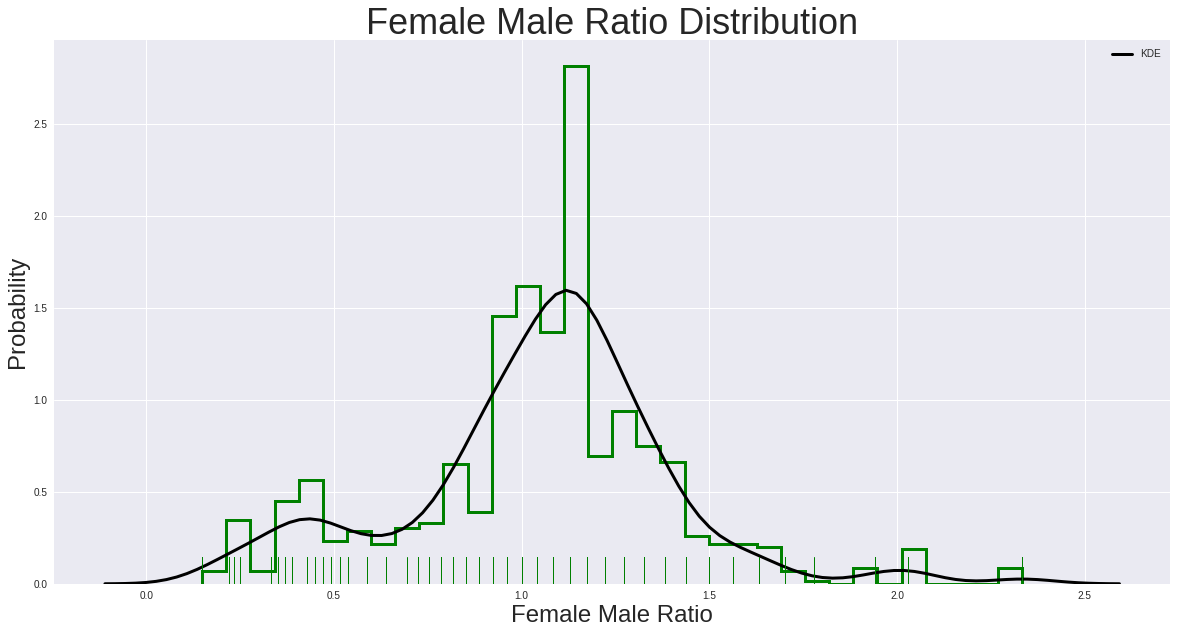

In [66]:
loop_plot(distplot)

Distplot from 2011 to 2016

In [55]:
def facegrid(df, column):
    g = sns.FacetGrid(df, col='year')
    g.map(sns.distplot, column)
    sns.plt.show()

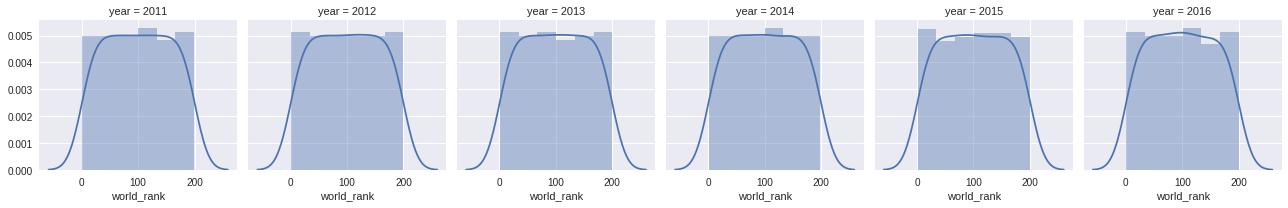

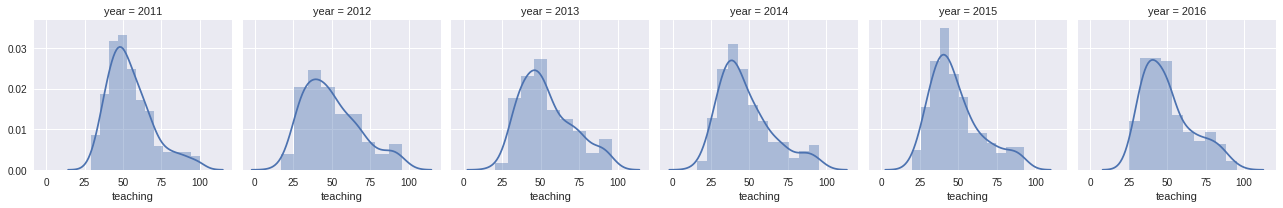

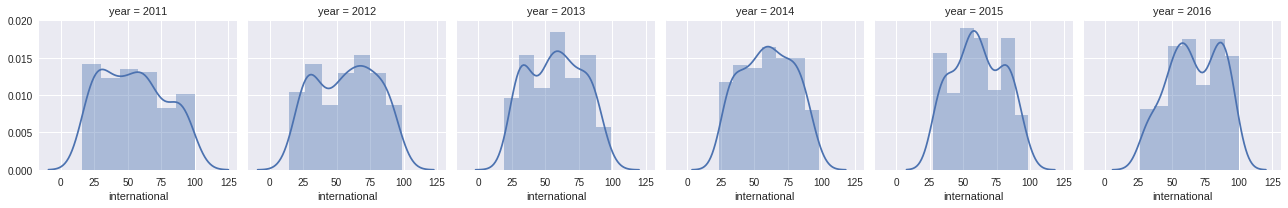

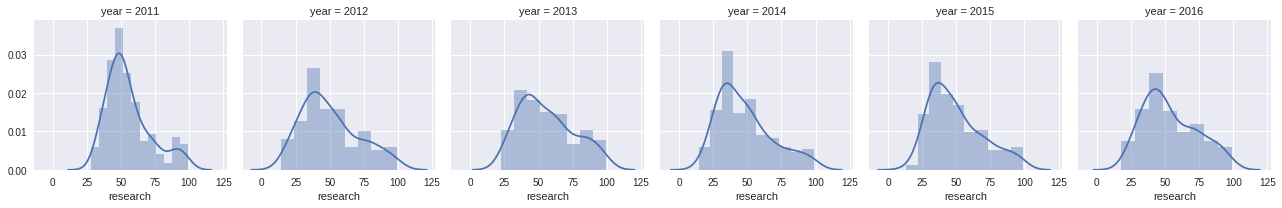

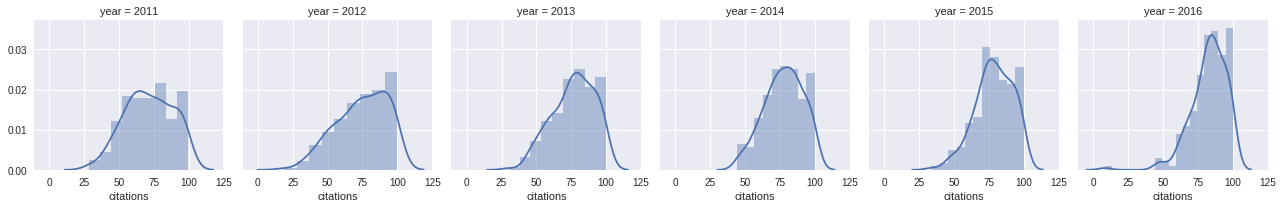

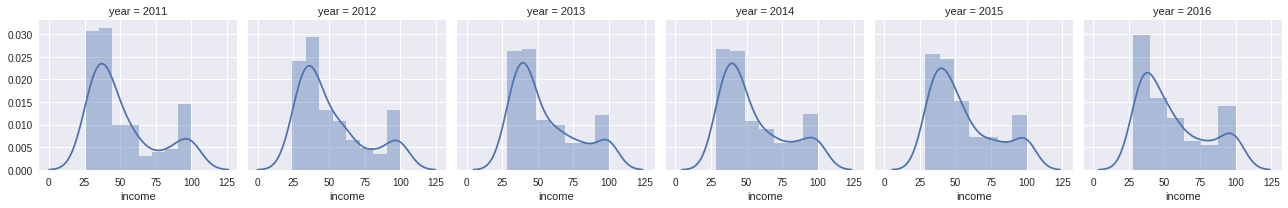

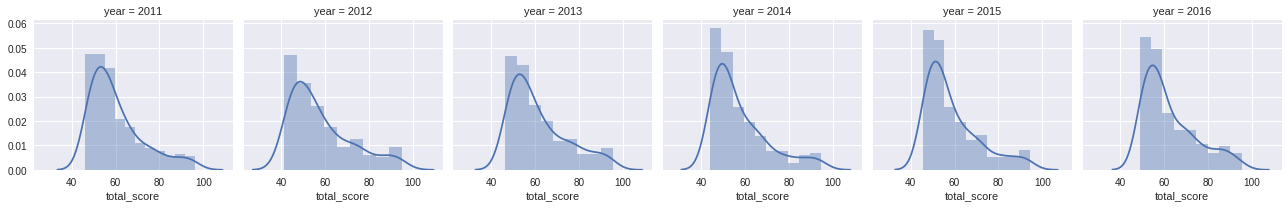

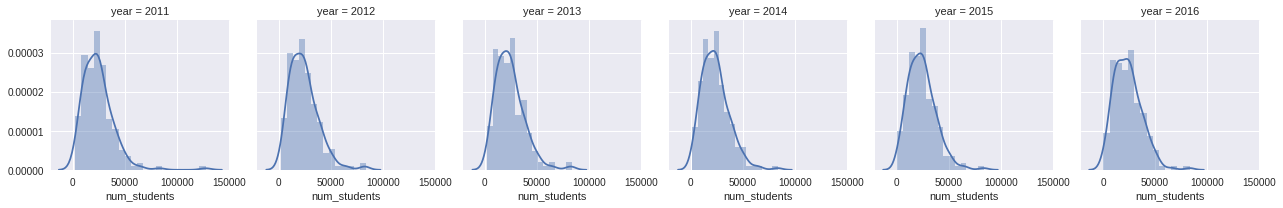

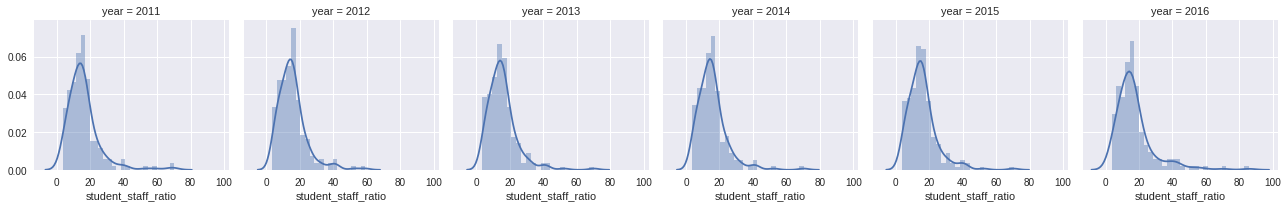

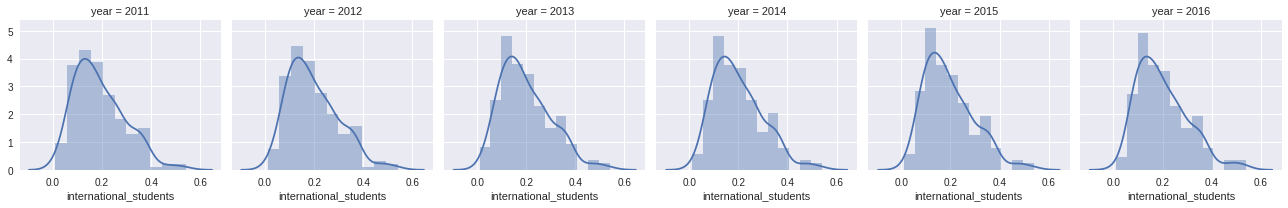

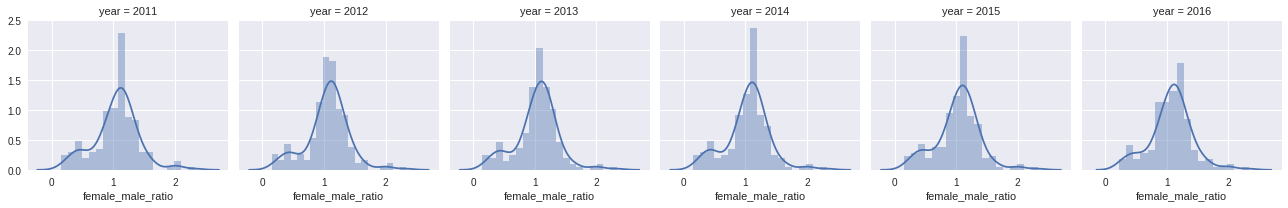

In [56]:
loop_plot(facegrid)

# Relationship

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 
1 is total positive linear correlation, 0 is no linear correlation, and 
−1 is total negative linear correlation.

DataFrame.corr(method='pearson', min_periods=1)

In [174]:
data_corr = wur_data.corr()

The heatmap is a correlation matrix.

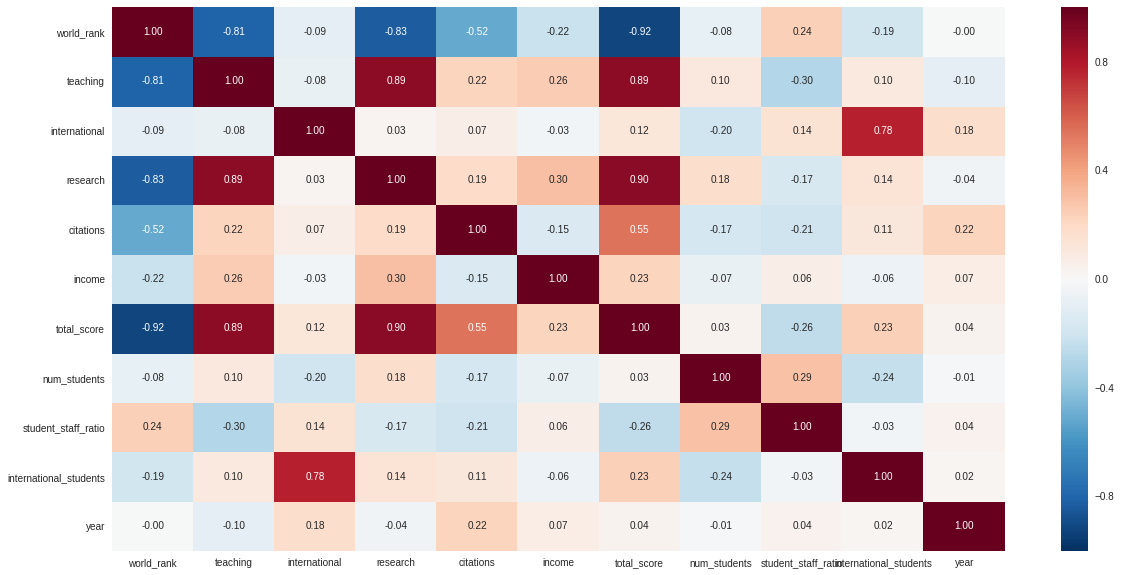

In [175]:
sns.heatmap(data_corr, annot=True, fmt=".2f")

Apart from parameters having PPC = 1 with themselves;

Some relationships with high Pearson correlation coefficient (more than 0.5):

research -- total_score; 0.90

teaching -- total_score; 0.89

research -- teaching; 0.89

international_students -- international; 0.78

citations -- total_score; 0.55

In [176]:
data_corr_high = data_corr[data_corr > 0.5][data_corr < 1]

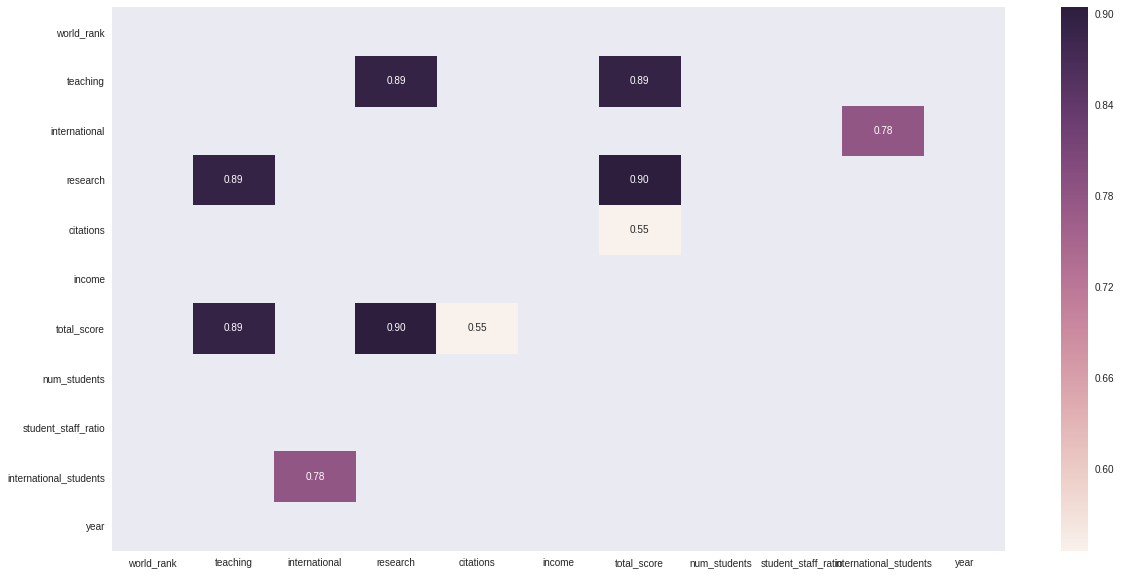

In [177]:
sns.heatmap(data_corr_high, annot=True, fmt=".2f")

## Correlation between two parameters

Seaborn.jointplot():

Draw a plot of two variables with bivariate and univariate graphs;

Kind = 'reg'.

### Regression Analysis

In statistical modeling, regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors').

Pearson Correlation Coefficient (PCC);

P-value: the probabolity pf an uncorrelated system producing datastes that have a Pearson correlation.

### research -- total_score    0.90

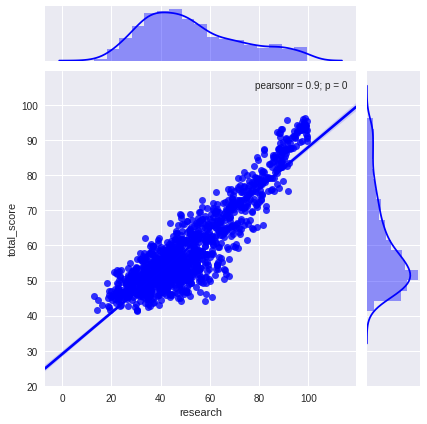

In [179]:
sns.jointplot(data=wur_data, x='research', y='total_score', kind='reg', color='b')
sns.plt.show()

### teaching -- total_score    0.89

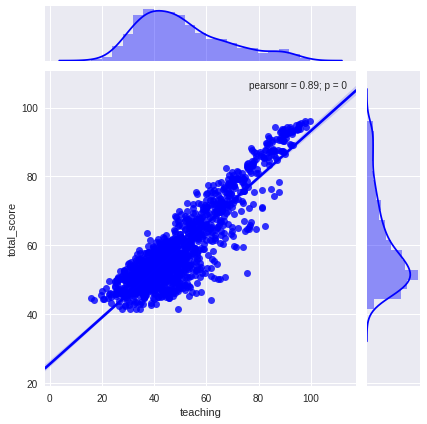

In [180]:
sns.jointplot(data=wur_data, x='teaching', y='total_score', kind='reg', color='b')
sns.plt.show()

### teaching -- research    0.89

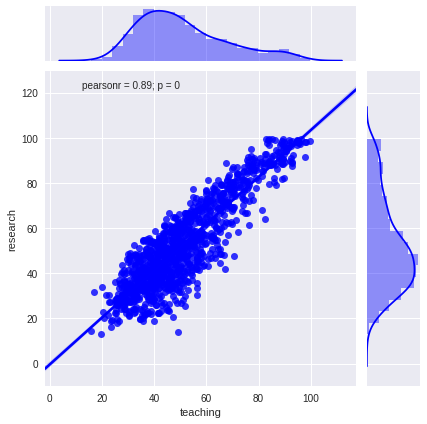

In [181]:
sns.jointplot(data=wur_data, x='teaching', y='research', kind='reg', color='b')
sns.plt.show()

### international_students -- international    0.78

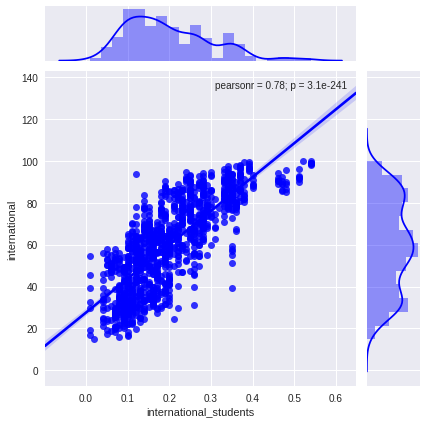

In [182]:
sns.jointplot(data=wur_data, x='international_students', y='international', kind='reg', color='b')
sns.plt.show()

### citations -- total_score 0.55

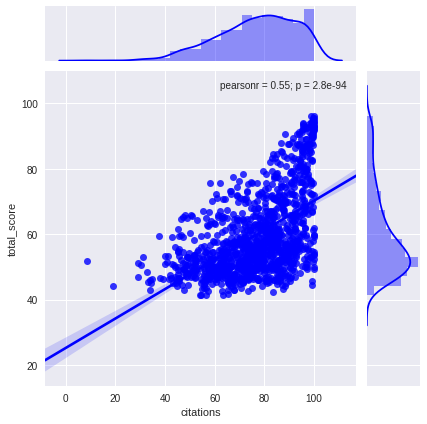

In [179]:
sns.jointplot(data=wur_data, x='citations', y='total_score', kind='reg', color='b')
sns.plt.show()

# ? ANY COOL FINDINGS